# Exploratory Data Analysis

The goal of this notebook is to explore the data and get a better understanding of the data with the idea of to create the best penguin classifier.

## Steps

- 1 Understanding the dataset
- 2 Load the dataset
- 3 Inspect the dataset
- 4 Data type conversion
- 5 Identify missing values
- 6 Detect and handle outliers
- 7 Analyze relationships between variables
- 8 Explore categorical variables
- 9 Impute missing values
- 10 Normalize and scale data
- 11 Pandas Profiling
- 12 Clustering, dimension reduction with PCA
- 13 Model selection and evaluation
- 14 Report and communicate findings

## 1) Understanding the dataset

Start familiarizing with the dataset. Understand the context, the purpose of the data, and the problem trying to solve. Look for documentation or metadata that provides information about the dataset, its variables, and its source.

### Columns description

- studyName: The name of the study that collected the data. (Categorical)
- Sample Number: A unique identifier for each sample in the dataset. (Categorical)
- Species: The species of the penguin (e.g., Adelie Penguin). (Categorical)
- Region: The region where the penguin was observed. (Categorical)
- Island: The island where the penguin was observed. (Categorical)
- Stage: The stage of the penguin's life cycle at the time of observation (e.g., Adult, 1 Egg Stage). (Categorical)
- Individual ID: A unique identifier for each individual penguin. (Categorical)
- Clutch Completion: Whether the penguin has completed its clutch (a set of eggs laid by a bird). (Categorical - Binary)
- Date Egg: The date the egg was observed. (Datetime)
- Culmen Length (mm): The length of the penguin's culmen (the upper ridge of a bird's beak) in millimeters. (Numerical - Discrete)
- Culmen Depth (mm): The depth of the penguin's culmen in millimeters. (Numerical - Discrete)
- Flipper Length (mm): The length of the penguin's flipper (wing) in millimeters. (Numerical - Discrete)
- Body Mass (g): The body mass of the penguin in grams. (Numerical - Discrete)
- Sex: The sex of the penguin (Male, Female). (Categorical - Binary)
- Delta 15 N (o/oo): The ratio of stable isotopes of nitrogen (15N/14N) in the penguin's blood, indicating the penguin's trophic level. (Numerical - Continuous)
- Delta 13 C (o/oo): The ratio of stable isotopes of carbon (13C/12C) in the penguin's blood, indicating the penguin's foraging habitat. (Numerical - Continuous)
- Comments: Additional comments related to the penguin or the sample. (Text)

### First impressions

The dataset contains several variables, such as:

- Species: The species of the penguin (e.g., Adelie, Gentoo, Chinstrap).
- Island: The island where the penguin was observed.
- Culmen Length and Culmen Depth: Measurements of the penguin's beak, which can be useful for differentiating between species and understanding feeding habits.
- Flipper Length and Body Mass: Measurements of the penguin's body size, which can be indicators of their overall health, age, and ability to swim or dive.
- Sex: The sex of the penguin.
- Delta 15 N and Delta 13 C: Isotopic ratios that can provide information about the penguin's diet, foraging ecology, and trophic position within the food web.

I can already see that some data are missing, and I will need to deal with them later.

The "Species" column contains the common name and the (scientific name). Keeping both' doesn't add any value to our analysis.

The "Sample Number" is a unique identifier for each sample, so it will not be useful for our analysis.

The "IndividualID" may be useful to identify the penguins, but I will need to check if it is unique.

The "Stage" column contains only a value, so it will not be useful for our analysis.

The "Sex" feature contains a binary value, some values are missing and some are wrong.

The "Date Egg" column is a trying and needs to be converted to a datetime format.

Some sample are missing many values, and we will need to decide if we want to keep them or not.

Overall, the dataset is a study on penguins. It seems they were studying the morphological characteristics and the isotopic signatures of different species and geographic areas. Also, they keep track of they egg and the clutch completion.

## 2) Load the dataset

Importing the data into the notebook using padnas. And check the correct interpretation.

In [92]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [93]:
# Load the dataset
df = pd.read_csv('data/penguins.csv')
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

The dataset seems correctly loaded.

## 3) Inspect the dataset

Use functions like head(), tail(), info() or describe() to get an overview of the dataset, its shape, and basic summary statistics to identify any immediate issues or patterns in the data.

In [94]:
df.shape

(344, 17)

In [95]:
df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion  Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  11/11/07   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  11/11/07   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  11/16/07   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  11/16/07   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  11/16/07   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [97]:
df.describe()

Sample Number  Culmen Length (mm)  Culmen Depth (mm)  \
count     344.000000          342.000000         342.000000   
mean       63.151163           43.921930          17.151170   
std        40.430199            5.459584           1.974793   
min         1.000000           32.100000          13.100000   
25%        29.000000           39.225000          15.600000   
50%        58.000000           44.450000          17.300000   
75%        95.250000           48.500000          18.700000   
max       152.000000           59.600000          21.500000   

       Flipper Length (mm)  Body Mass (g)  Delta 15 N (o/oo)  \
count           342.000000     342.000000         330.000000   
mean            200.915205    4201.754386           8.733382   
std              14.061714     801.954536           0.551770   
min             172.000000    2700.000000           7.632200   
25%             190.000000    3550.000000           8.299890   
50%             197.000000    4050.000000           8.652405   
75%             213.000000    4750.000000           9.172123   
max             231.000000    6300.000000          10.025440   

       Delta 13 C (o/oo)  
count         331.000000  
mean          -25.686292  
std             0.793961  
min           -27.018540  
25%           -26.320305  
50%           -25.833520  
75%           -25.062050  
max           -23.787670

In [98]:
# get the number of unique values for each column
df.nunique()

studyName                3
Sample Number          152
Species                  3
Region                   1
Island                   3
Stage                    1
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

In [99]:
# remove the columns with only one unique value because are useless for the analysis but
# keep it in a separate dataframe
df_unique = df.loc[:, df.nunique() == 1]
df_unique.head()

Region               Stage
0  Anvers  Adult, 1 Egg Stage
1  Anvers  Adult, 1 Egg Stage
2  Anvers  Adult, 1 Egg Stage
3  Anvers  Adult, 1 Egg Stage
4  Anvers  Adult, 1 Egg Stage

In [100]:
# drop the columns with only one unique value
df.drop(df_unique.columns, axis=1, inplace=True)

In [101]:
# list all comments
df['Comments'].unique()

array(['Not enough blood for isotopes.', nan, 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

In [102]:
# shows the blood info column that has a comment and its comment
df[df['Comments'].notnull()][['Sex', 'Clutch Completion', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments']]

Sex Clutch Completion  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0      MALE               Yes                NaN                NaN   
3       NaN               Yes                NaN                NaN   
6    FEMALE                No            9.18718          -25.21799   
7      MALE                No            9.46060          -24.89958   
8       NaN               Yes                NaN                NaN   
9       NaN               Yes            9.13362          -25.09368   
10      NaN               Yes            8.63243          -25.21315   
11      NaN               Yes                NaN                NaN   
12   FEMALE               Yes                NaN                NaN   
13     MALE               Yes                NaN                NaN   
15   FEMALE               Yes                NaN                NaN   
28   FEMALE                No            8.38404          -25.19837   
29     MALE                No            8.90027          -25.11609   
38   FEMALE                No            9.41131          -25.04169   
39     MALE                No                NaN                NaN   
41     MALE               Yes                NaN                NaN   
46     MALE               Yes                NaN                NaN   
47      NaN               Yes                NaN                NaN   
68   FEMALE                No            8.47781          -26.07821   
69     MALE                No            8.86853          -26.06209   
120  FEMALE                No            9.04296          -26.19444   
121    MALE                No            9.11066          -26.42563   
130  FEMALE                No            8.98460          -25.57956   
131    MALE                No            8.86495          -26.13960   
138  FEMALE                No            8.61651          -26.07021   
139    MALE                No            9.25769          -25.88798   

                                              Comments  
0                       Not enough blood for isotopes.  
3                                   Adult not sampled.  
6                Nest never observed with full clutch.  
7                Nest never observed with full clutch.  
8                            No blood sample obtained.  
9                 No blood sample obtained for sexing.  
10                No blood sample obtained for sexing.  
11                           No blood sample obtained.  
12                      Not enough blood for isotopes.  
13                      Not enough blood for isotopes.  
15                      Not enough blood for isotopes.  
28               Nest never observed with full clutch.  
29               Nest never observed with full clutch.  
38               Nest never observed with full clutch.  
39   Nest never observed with full clutch. Not enou...  
41                      Not enough blood for isotopes.  
46                      Not enough blood for isotopes.  
47   Sexing primers did not amplify. Not enough blo...  
68               Nest never observed with full clutch.  
69               Nest never observed with full clutch.  
120              Nest never observed with full clutch.  
121              Nest never observed with full clutch.  
130              Nest never observed with full clutch.  
131              Nest never observed with full clutch.  
138              Nest never observed with full clutch.  
139              Nest never observed with full clutch.

In [103]:
# drop the comments useless column
df.drop('Comments', axis=1, inplace=True)
df.head()

studyName  Sample Number                              Species     Island  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Torgersen   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Torgersen   

  Individual ID Clutch Completion  Date Egg  Culmen Length (mm)  \
0          N1A1               Yes  11/11/07                39.1   
1          N1A2               Yes  11/11/07                39.5   
2          N2A1               Yes  11/16/07                40.3   
3          N2A2               Yes  11/16/07                 NaN   
4          N3A1               Yes  11/16/07                36.7   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)     Sex  \
0               18.7                181.0         3750.0    MALE   
1               17.4                186.0         3800.0  FEMALE   
2               18.0                195.0         3250.0  FEMALE   
3                NaN                  NaN            NaN     NaN   
4               19.3                193.0         3450.0  FEMALE   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  
0                NaN                NaN  
1            8.94956          -24.69454  
2            8.36821          -25.33302  
3                NaN                NaN  
4            8.76651          -25.32426

In [104]:
# count the number of "sample number" unique repetitions
df['Sample Number'].value_counts()

1      3
45     3
52     3
51     3
50     3
      ..
129    1
128    1
127    1
126    1
152    1
Name: Sample Number, Length: 152, dtype: int64

In [105]:
# drop the sample number column
df.drop('Sample Number', axis=1, inplace=True)

df.head()

studyName                              Species     Island Individual ID  \
0   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A1   
1   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A2   
2   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A1   
3   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A2   
4   PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A1   

  Clutch Completion  Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0               Yes  11/11/07                39.1               18.7   
1               Yes  11/11/07                39.5               17.4   
2               Yes  11/16/07                40.3               18.0   
3               Yes  11/16/07                 NaN                NaN   
4               Yes  11/16/07                36.7               19.3   

   Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                181.0         3750.0    MALE                NaN   
1                186.0         3800.0  FEMALE            8.94956   
2                195.0         3250.0  FEMALE            8.36821   
3                  NaN            NaN     NaN                NaN   
4                193.0         3450.0  FEMALE            8.76651   

   Delta 13 C (o/oo)  
0                NaN  
1          -24.69454  
2          -25.33302  
3                NaN  
4          -25.32426

The dataset consist in 17 features and 344 samples. The dataset contains 7 pure numerical features. Many values are missing and have been replaced by NaN. The dataset has 1 date feature. Some columns are clearly useless.

The numerical features have different scales, and could be useful to apply some scaling later. Also, these values are not too big, therefore should not be a problem to manipulate them.

Also, the columns "Region" and "Stage" have been dropped because they contain only one value.

The "comments" columns contains 26 non-null values where only 6 are comments, this comments basically says that they couldn't get the sample since the blood wasn't enough or that "Nest never observed with full clutch". We can say that because the blood information are missing in the first case, or because the column "Clutch completion" is "No", the comments are redundant and can be dropped since they add no information.

The comment "No blood sample obtained for sexing" indicate that these researchers used the blood sample to determinate the sex, so if
they failed to amplify the DNA or didn't take enough blood, the sex of the penguin will be empty.

The "Sample Number" column contains 152 unique values, but the column "Individual ID" contains 191 unique values. This means that some samples are from the same penguin. This is may not a problem, but I need to keep it in mind. The total number of samples is 344, but the total number of unique "Sample Number" is 152, this because some penguins have been sampled more than once with the same "Individual ID". And a sample get more individuals in one go. This means I can drop the sample ID because is an arbitrary number that add no information other than a chronological order, which is already in the date feature, but I will keep the Individual ID.

The "Study number" may also be dropped since there is logic correlation and seems less important at this point, but I will keep it for now.

## 4 Data type conversion

Ensure that each variable is of the appropriate data type (e.g., numeric, categorical, datetime).
Convert any variables with incorrect data types.
Convert with LabelEncoder or OrdinalEncoder.

In the step 3 I found out many columns that need to be converted to the correct data type.

For this step I looked at the values of the non-numerical columns, if they are non-ordinal and only 2 values are possible (eg: sex)
I will use the LabelEncoder, if more than 2 values are possible I will use the OneHotEncoder (eg: species).
If the values are ordinal I will use the OrdinalEncoder.

Since the "Individual ID" is non-ordinal but contains a lot of unique values, I will encode is with the label encoder
because the one-hot encoder could generate too many columns. I could then reduce the number of columns with a PCA, but this
may start to be too complicated for a TP.

Also, I will convert the "Date Egg" column to a datetime format.

To simplify the coding and encoding I wrote a convenience class that will do all the work for me.

In [106]:
# Import the custom EncoderManager class
%load_ext autoreload
%autoreload 2

from lib.EncoderManager import EncoderManager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
# list of non-numerical columns and the count of their unique values
df.select_dtypes(exclude='number').nunique()

studyName              3
Species                3
Island                 3
Individual ID        190
Clutch Completion      2
Date Egg              50
Sex                    3
dtype: int64

In [108]:
# Convert to date with pandas.to_datetime
df['Date Egg'] = pd.to_datetime(df['Date Egg'])

# Define the columns to encode with LabelEncoder
columns_to_label_encode = ['Clutch Completion', 'Sex', 'Individual ID']

# Define the columns to encode with OrdinalEncoder
# since the date type gives me many problem il convert it to ordinal
# however, this column is not very interesting for the prediction
columns_to_ordinal_encode = ["Date Egg"]

# Define the columns to encode with OneHotEncoder
columns_to_onehot_encode = ['studyName', 'Species', 'Island']

In [109]:
penguin_manager = EncoderManager(df, columns_to_label_encode, columns_to_ordinal_encode, columns_to_onehot_encode)

penguin_manager.encode(inplace=True).get_df()

Individual ID  Clutch Completion  Date Egg  Culmen Length (mm)  \
0               22                  1       2.0                39.1   
1               23                  1       2.0                39.5   
2               44                  1       6.0                40.3   
3               45                  1       6.0                 NaN   
4               66                  1       6.0                36.7   
..             ...                ...       ...                 ...   
339             63                  0      49.0                 NaN   
340             64                  1      45.0                46.8   
341             65                  1      45.0                50.4   
342             74                  1      45.0                45.2   
343             75                  1      45.0                49.9   

     Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
0                 18.7                181.0         3750.0    2   
1                 17.4                186.0         3800.0    1   
2                 18.0                195.0         3250.0    1   
3                  NaN                  NaN            NaN    3   
4                 19.3                193.0         3450.0    1   
..                 ...                  ...            ...  ...   
339                NaN                  NaN            NaN    3   
340               14.3                215.0         4850.0    1   
341               15.7                222.0         5750.0    2   
342               14.8                212.0         5200.0    1   
343               16.1                213.0         5400.0    2   

     Delta 15 N (o/oo)  Delta 13 C (o/oo)  studyName_PAL0708  \
0                  NaN                NaN                1.0   
1              8.94956          -24.69454                1.0   
2              8.36821          -25.33302                1.0   
3                  NaN                NaN                1.0   
4              8.76651          -25.32426                1.0   
..                 ...                ...                ...   
339                NaN                NaN                0.0   
340            8.41151          -26.13832                0.0   
341            8.30166          -26.04117                0.0   
342            8.24246          -26.11969                0.0   
343            8.36390          -26.15531                0.0   

     studyName_PAL0809  studyName_PAL0910  \
0                  0.0                0.0   
1                  0.0                0.0   
2                  0.0                0.0   
3                  0.0                0.0   
4                  0.0                0.0   
..                 ...                ...   
339                0.0                1.0   
340                0.0                1.0   
341                0.0                1.0   
342                0.0                1.0   
343                0.0                1.0   

     Species_Adelie Penguin (Pygoscelis adeliae)  \
0                                            1.0   
1                                            1.0   
2                                            1.0   
3                                            1.0   
4                                            1.0   
..                                           ...   
339                                          0.0   
340                                          0.0   
341                                          0.0   
342                                          0.0   
343                                          0.0   

     Species_Chinstrap penguin (Pygoscelis antarctica)  \
0                                                  0.0   
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   
..                                                 ...   
339   

In [110]:
penguin_manager = EncoderManager(df, columns_to_label_encode, columns_to_ordinal_encode, columns_to_onehot_encode)
df = penguin_manager.get_df()
df["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

In [111]:
df = penguin_manager.get_df()
df["Island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [112]:
df = penguin_manager.get_df()
df["studyName"].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

So now I have a correctly encoded dataset, and I can easily decode it back to the original format with the penguin_manager.decode() method.

## 5 Identify missing values

Determine the extent of missing values in the dataset by calculating the percentage of missing values for each variable.
Decide whether to impute, drop, or interpolate missing values based on the context and the importance of the variable.

For this step I will use the library missingno to visualize the missing values. Missingno is a library specialized in visualize the *missing values* in a dataset in a very intuitive way.

In [113]:
# if uncommented, install missingno if not already installed
# !pip install missingno
# note: to works it need matplotlib=3.5.0
import missingno as msno

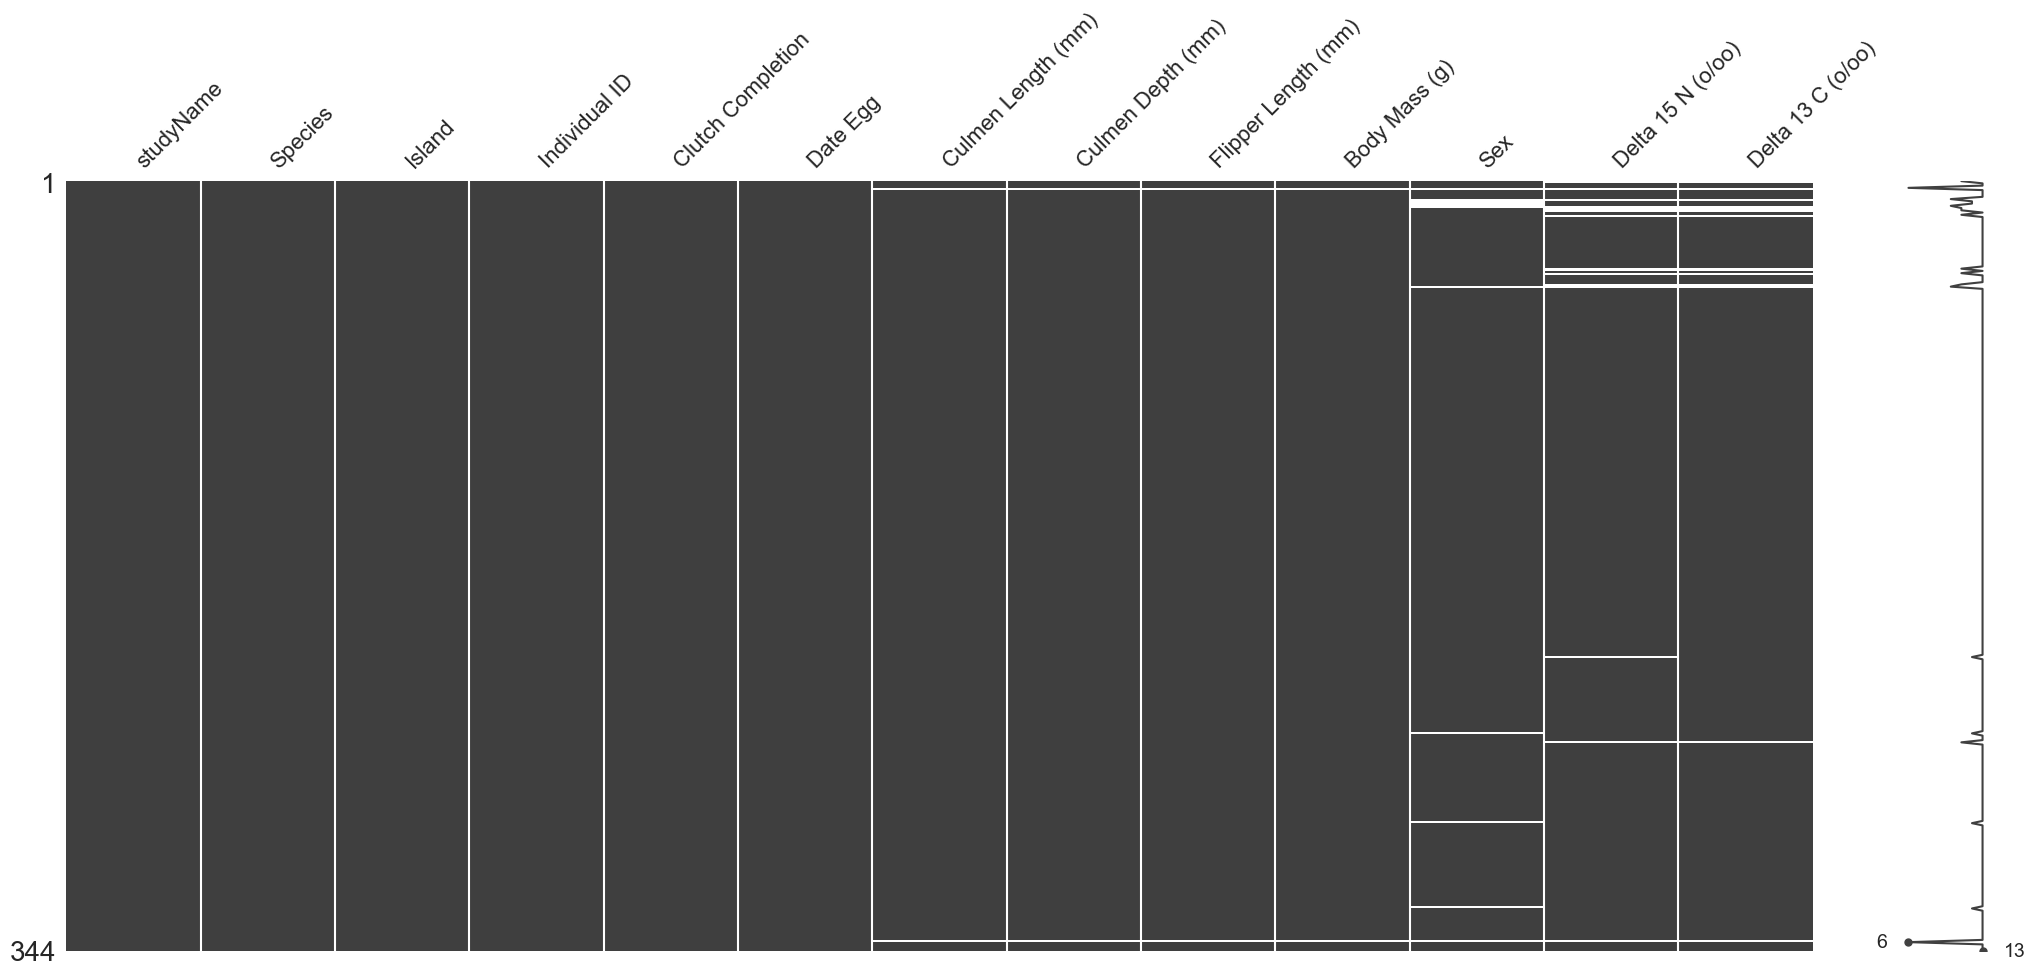

In [114]:
# visualize a matrix of the missing values
warnings.filterwarnings('ignore')
msno.matrix(penguin_manager.get_df())
warnings.filterwarnings('default')

With this matrix plot in particular we can see which column has missing value (axis x) in function of the sample index (axis y). Also, on the right side there is a line that shows the number of non-missing in that "zone" of the matrix.

With this we can also see if some zone contains the missing values are missing in a specific zone, in more columns together, or if they are missing randomly.

In this dataset we see that the 2 blood measures are missing together. Which il logic if we think that those aren't taken if they could get enough blood from the penguin. The measures of the anatomical parts also tend to miss together. Also, we see some missing values in the "sex" column. Later in this step i want to see if this value could be inferred by another sample of the same penguin "Individual ID". Or maybe, since usually sex differences are quite evident, I could try to predict it with a machine learning model.

We can also see that in the firsts and lasts samples some row are missing many columns, in this case could be simpler to drop those rows because they are missing too many values.

In [115]:
# get an idea of what to expect in terms of missing values
penguin_manager.get_df().isna().sum()

studyName               0
Species                 0
Island                  0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64

<AxesSubplot:>

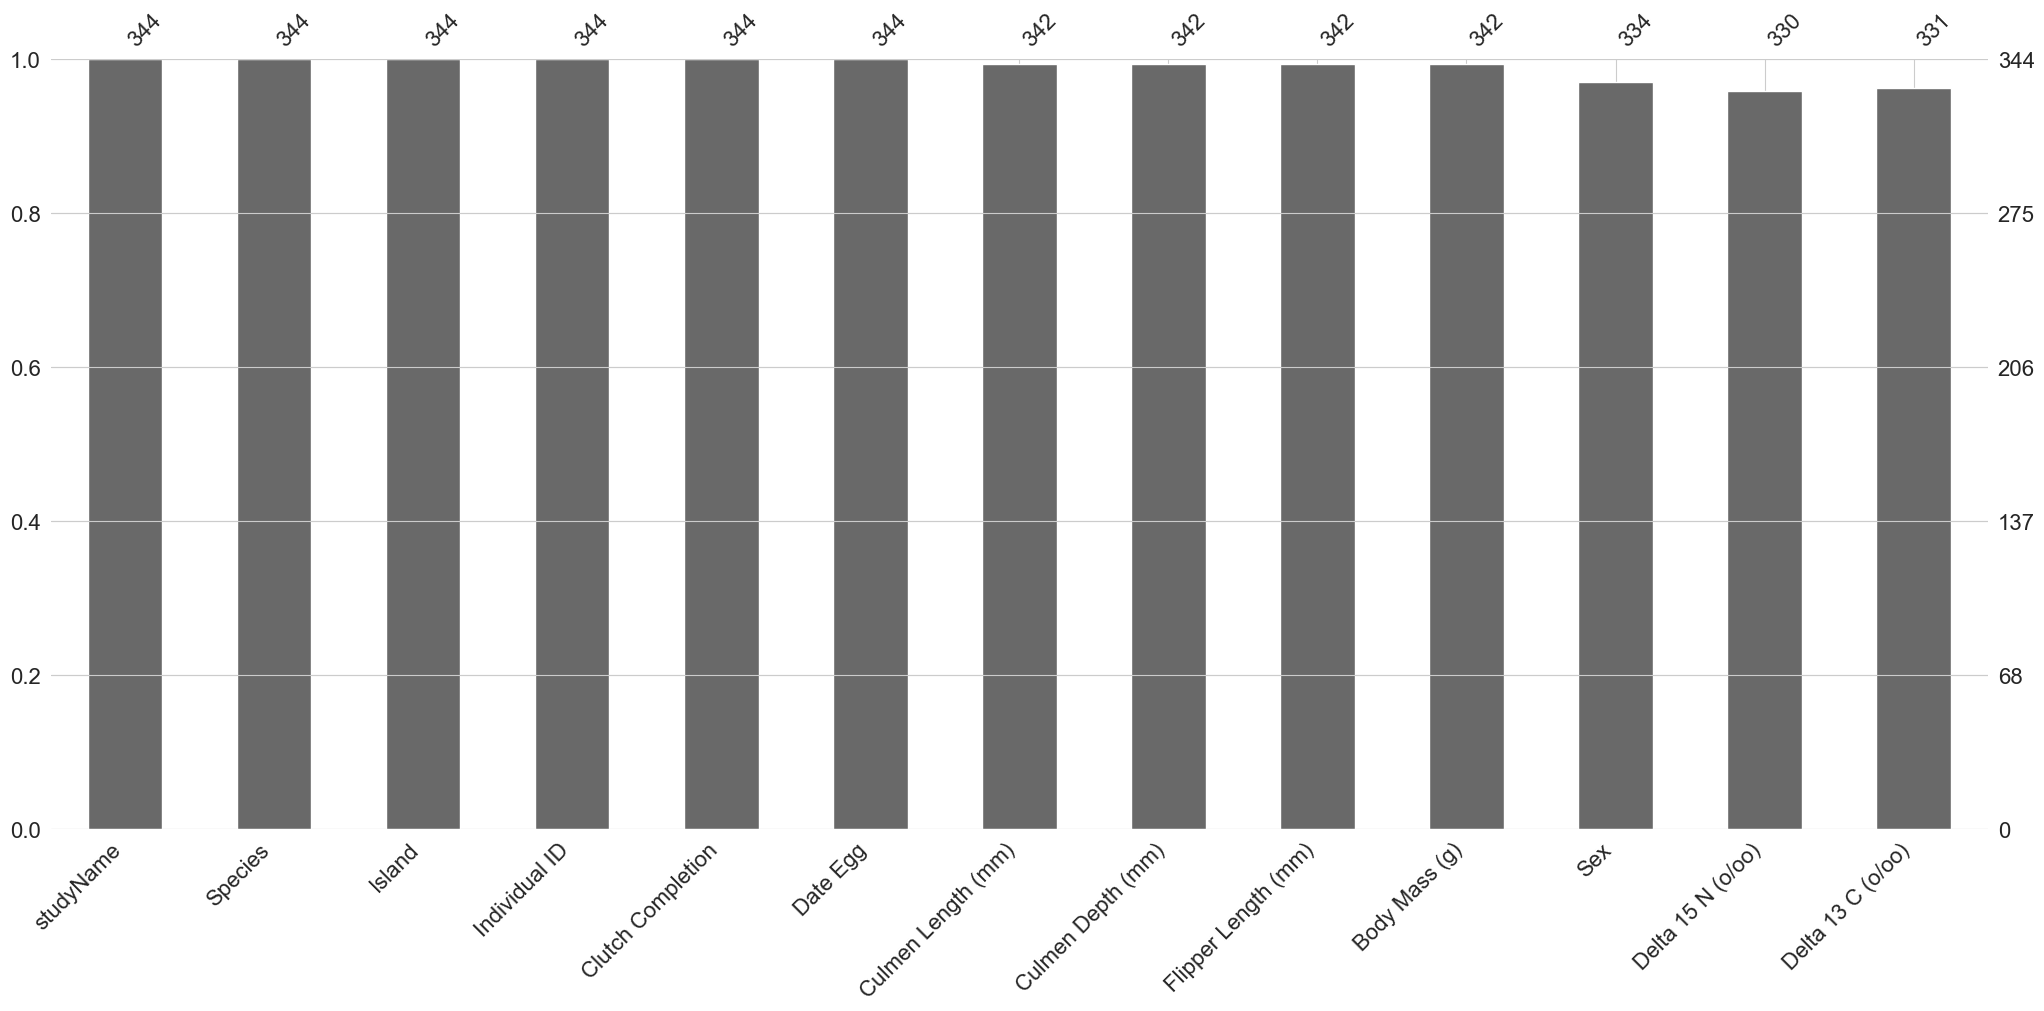

In [116]:
# visualize a bar chart of the missing values
msno.bar(penguin_manager.get_df())

With this bar chart we can see that even if some values are missing and at which percentage, overall the dataset is quite complete and quite balanced. Some data is missing in the columns as we seen in the matrix plot.

With this bar chart we can see that even if some values are missing, overall the dataset is quite complete.

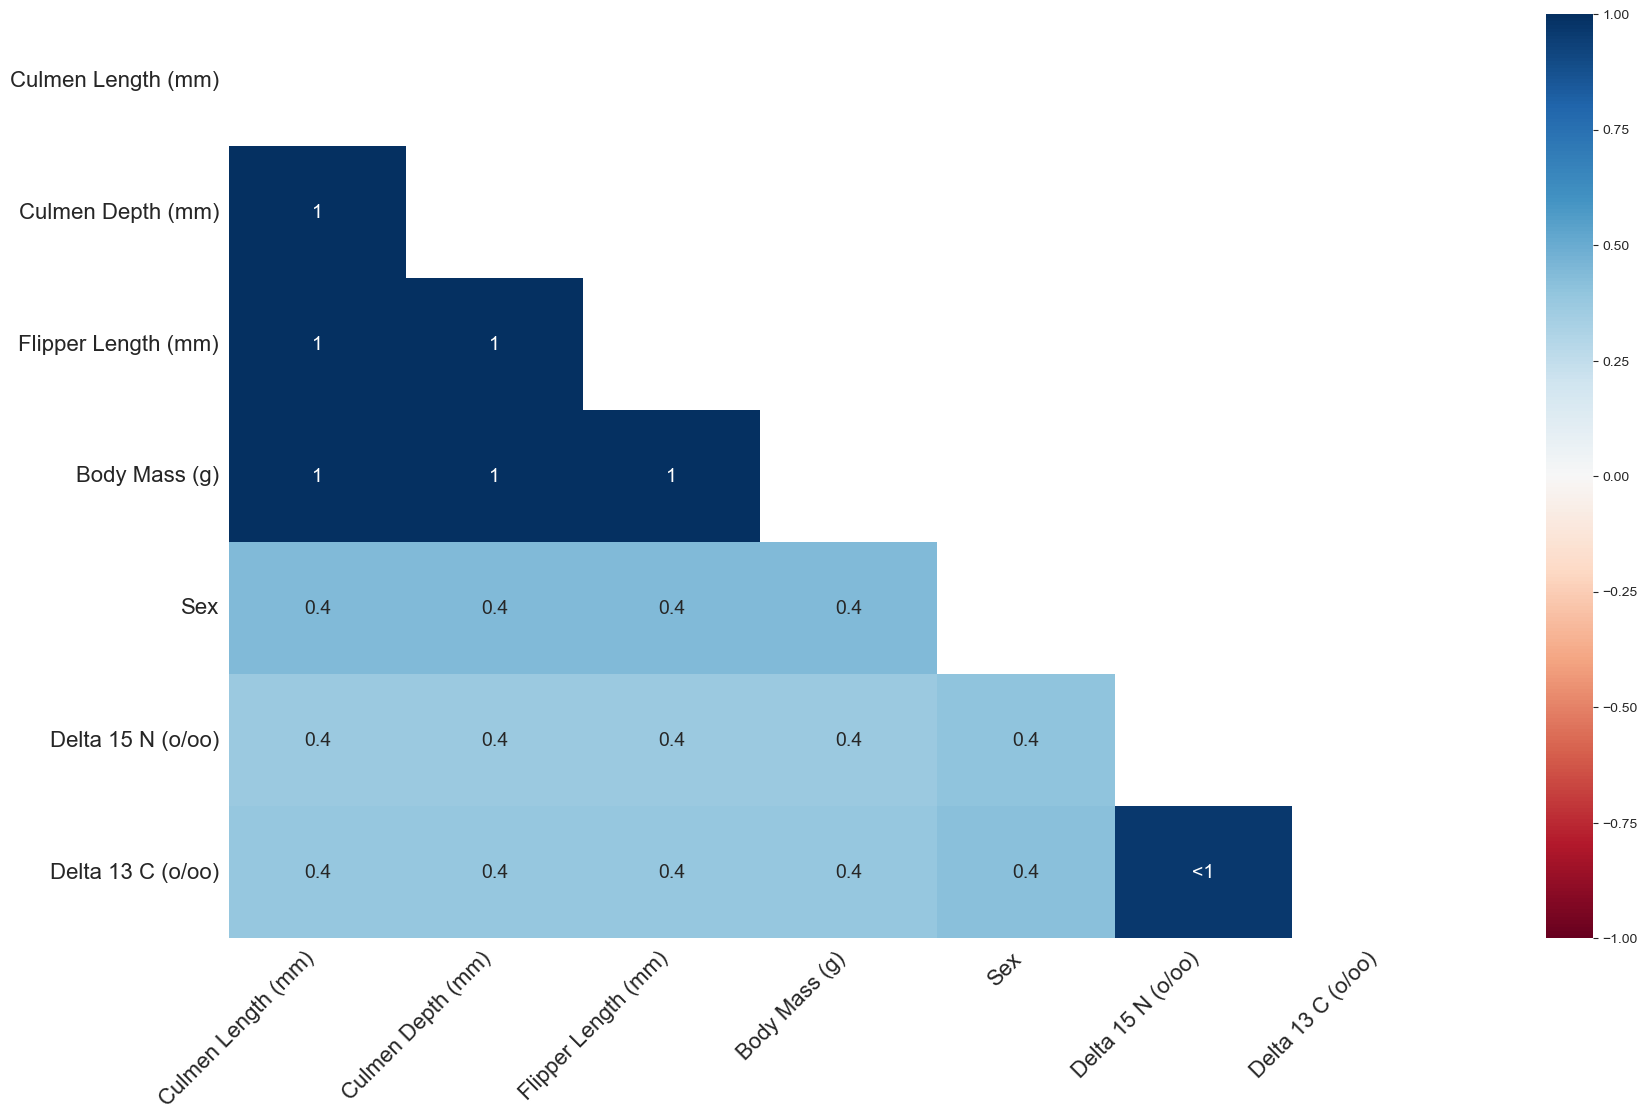

In [117]:
# heatmap of the missing values
warnings.filterwarnings('ignore')
msno.heatmap(penguin_manager.get_df())
warnings.filterwarnings('default')

The nullity correlation heatmap measures how strongly the presence or absence of one variable affects the presence of another. As we noticed before, the blood measures are missing together, and also the anatomical measures are missing together. This is why we see a strong correlation between those columns. For the other columns, we see that there is still a correlation of 0.4, this means that 40% of the values are missing in the same sample which something be aware of.

<AxesSubplot:>

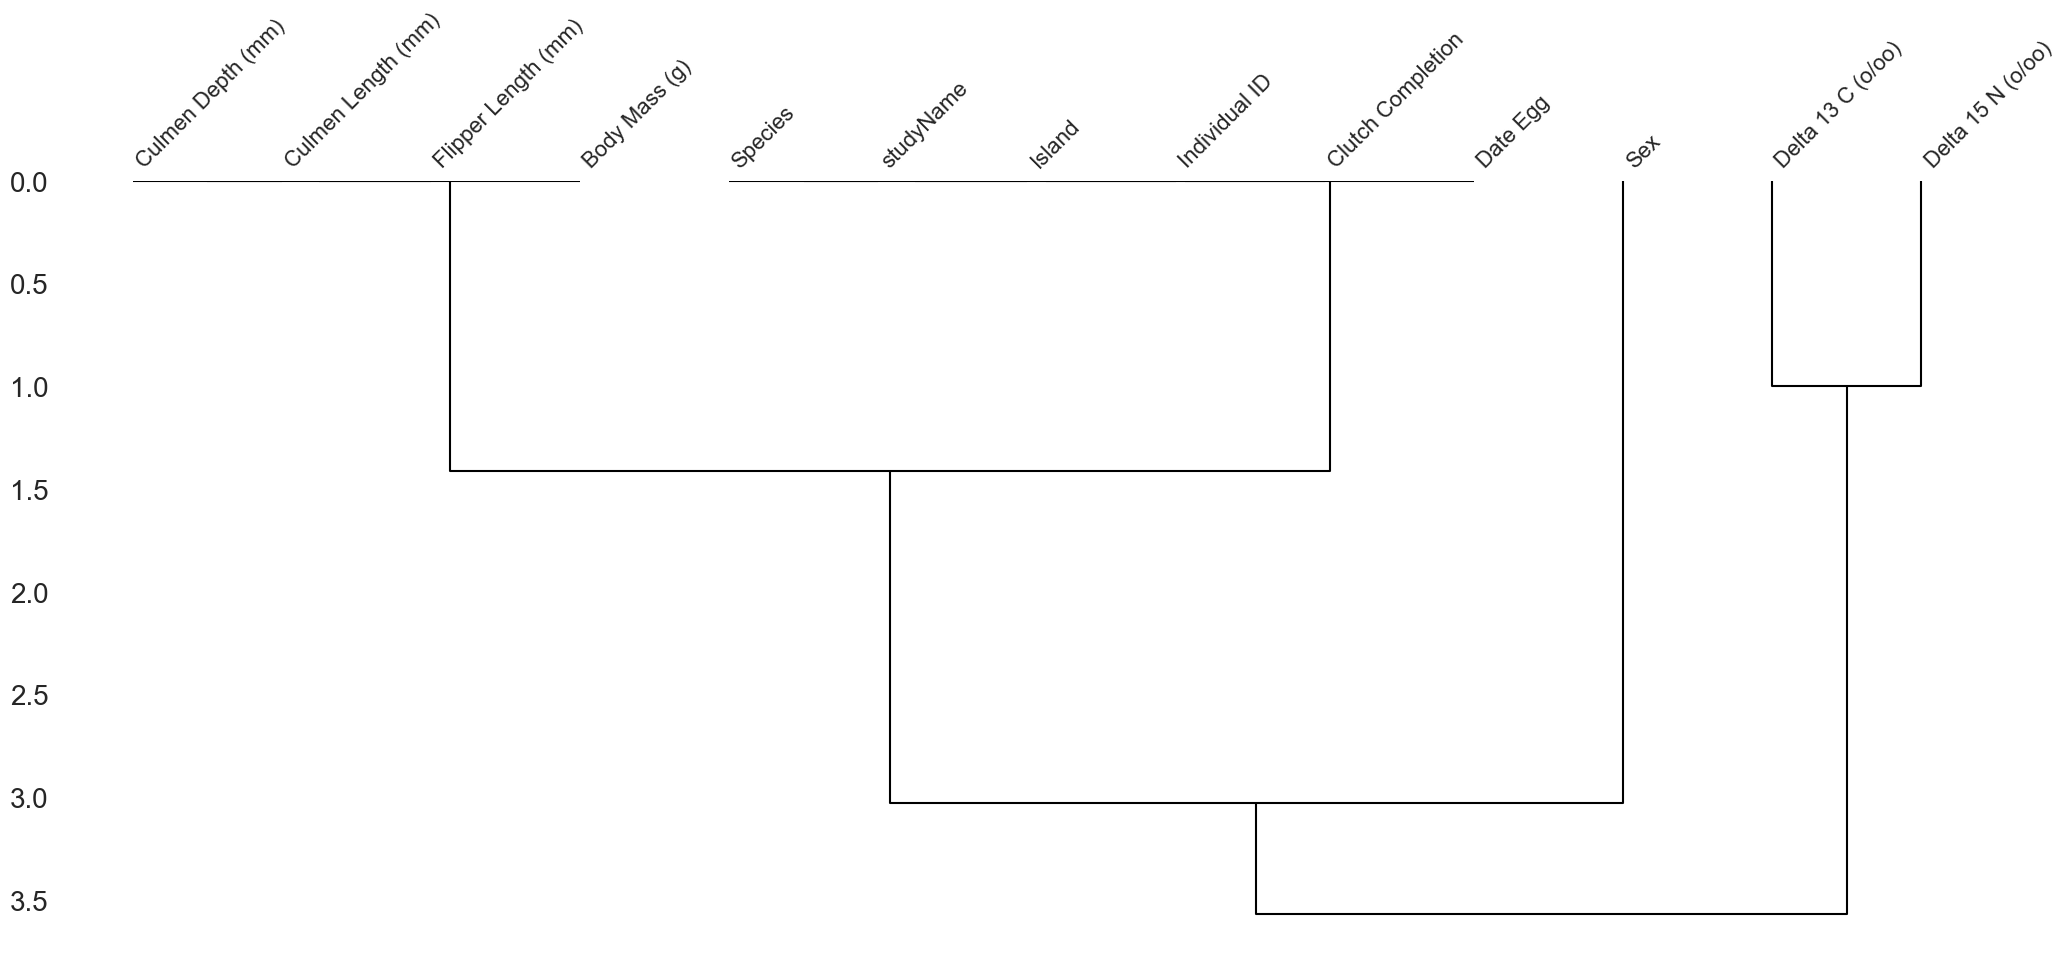

In [118]:
# dendrogram of the missing values
msno.dendrogram(penguin_manager.get_df())

The last plot is the dendrogram, which groups together the columns that have missing values in the same samples. We can see that the blood measures are coupled first as expected, the second couple is specie and flipper (and in general all anatomical measures), may be worth to look further into that.

At this point the first thing to do is to drop the rows that have too many missing values, and then decide what to do with the other missing values. I will drop this values because there is too little information to infer them.

In [119]:
# return only the cols with at least 5 missing values
penguin_manager.get_df()[penguin_manager.get_df().isna().sum(axis=1) > 5]

studyName                              Species     Island Individual ID  \
3     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A2   
339   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N38A2   

    Clutch Completion   Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
3                 Yes 2007-11-16                 NaN                NaN   
339                No 2009-12-01                 NaN                NaN   

     Flipper Length (mm)  Body Mass (g)  Sex  Delta 15 N (o/oo)  \
3                    NaN            NaN  NaN                NaN   
339                  NaN            NaN  NaN                NaN   

     Delta 13 C (o/oo)  
3                  NaN  
339                NaN

In [120]:
# drop the rows with at least 5 missing values
# Note: a faster solution would be to use dropna() with the threshold parameter, but
# after some try I found that it doesn't work and I don't know why
# so this is an alternative solution
missing_vals = penguin_manager.get_df().isna().sum(axis=1)

drop_rows = missing_vals[missing_vals > 5].index

penguin_manager.get_df().drop(drop_rows, inplace=True)
penguin_manager.get_df().reset_index(drop=True, inplace=True)

penguin_manager.get_df()[penguin_manager.get_df().isna().sum(axis=1) > 5]

Empty DataFrame
Columns: [studyName, Species, Island, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo)]
Index: []

In [121]:
# check the shape of the dataset
penguin_manager.get_df().shape

(342, 13)

This dropped 2 rows, which is not a big deal, and now we have a dataset with 334 rows but with way less missing values.

In [122]:
# check the missing values
penguin_manager.get_df().isna().sum()

studyName               0
Species                 0
Island                  0
Individual ID           0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                     8
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

There is still a problem with the columns "sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)".

First I want to see if the sex of some penguin is in another sample.

In [123]:
# get rows with empty values and extract its "Individual ID"
empty_ind_id = penguin_manager.get_df()[penguin_manager.get_df().isna().any(axis=1)]["Individual ID"].unique()
# then get the rows with the same "Individual ID"
row_ind_id = penguin_manager.get_df()[penguin_manager.get_df()["Individual ID"].isin(empty_ind_id)]
# now groups by individual id and see if there are samples with NaNs and not NaNs
row_ind_id_groups = row_ind_id.groupby("Individual ID").apply(lambda x: x.isna().any(axis=1).value_counts())
# True means that there is at least one NaN in the sample
row_ind_id_groups

Individual ID       
N1A1           True     1
               False    1
N24A1          False    2
               True     1
N25A2          True     1
               False    1
N26A2          True     1
N29A1          False    2
               True     1
N29A2          False    2
               True     1
N46A1          False    1
               True     1
N50A1          False    1
               True     1
N51A1          False    1
               True     1
N5A1           True     1
               False    1
N5A2           True     1
               False    1
N6A1           False    2
               True     1
N6A2           False    2
               True     1
N7A1           True     1
               False    1
N7A2           True     1
               False    1
N8A2           False    2
               True     1
N96A1          True     1
dtype: int64

In [124]:
# Now groups by individual id and see if there are samples with NaNs and not NaNs in the Sex column
row_ind_id_sex = row_ind_id.groupby("Individual ID").apply(lambda x: x["Sex"].isna().value_counts())

# True means that there is at least one NaN in the Sex column
row_ind_id_sex

Individual ID       
N1A1           False    2
N24A1          False    2
               True     1
N25A2          False    2
N26A2          False    1
N29A1          False    3
N29A2          False    2
               True     1
N46A1          False    1
               True     1
N50A1          False    2
N51A1          False    1
               True     1
N5A1           True     1
               False    1
N5A2           True     1
               False    1
N6A1           False    2
               True     1
N6A2           False    2
               True     1
N7A1           False    2
N7A2           False    2
N8A2           False    3
N96A1          False    1
Name: Sex, dtype: int64

Is interesting to see that some individuals have NaNs in some sample but not in others. This means we may know the truth for each sample of these individuals.

In the case of "Sex" I can directly address that.

In [125]:
# get the samples with nans in the column "Sex"
samples_with_nans = penguin_manager.get_df()[penguin_manager.get_df().isna().any(axis=1)]
samples_with_nans = samples_with_nans[samples_with_nans["Sex"].isna()]

# now for each individual id that have rows with nans get its rows
for individual_id in empty_ind_id:
    # get rows with the same individual id
    rows = penguin_manager.get_df()[penguin_manager.get_df()["Individual ID"] == individual_id]

    # check if Sex column has a non-null value
    sex_values = rows["Sex"].dropna().unique()
    if len(sex_values) == 1:
        sex = sex_values[0]
        # assign sex to all rows with the same individual id
        penguin_manager.get_df().loc[penguin_manager.get_df()["Individual ID"] == individual_id, "Sex"] = sex

# check the empty rows
count_nans = penguin_manager.get_df()["Sex"].isna().sum()
count_nans

1

The code is correct, but it didn't edit the added the sex to the rows. I don't know why, I need to investigate further.

Let's see the rows that still have NaNs:

In [126]:
# print the columns with empty values
penguin_manager.get_df().loc[penguin_manager.get_df().isna().any(axis=1)][["Individual ID", "Sex"]]

Individual ID     Sex
0            N1A1    MALE
7            N5A1  FEMALE
10           N6A2    MALE
11           N7A1  FEMALE
12           N7A2    MALE
14           N8A2  FEMALE
38          N25A2    MALE
40          N26A2    MALE
45          N29A1    MALE
46          N29A2    MALE
211         N96A1    MALE
249         N50A1    MALE
323         N24A1     NaN

Apparently the individual ID is not the id of a single penguin, OR the sample have wrong values. OR penguins have the ability to change sex...

*Note: After some research it turned out that Adélie penguin (Pygoscelis Adelia) e il Chinstrap penguin (Pygoscelis antarctica) and Gentoo penguin (Pygoscelis papua) actually have the ability to change sex...* this is actually something important to keep in mind, and it explains why there are
Individuals with different sex in different samples. This means that would be useless to inference the sex based on the anatomical measures, because they cannot be related, at least not in these 3 species.

I also mean that in out dataset the only way to know the sex is through blood isotopes, but they are missing for these rows.

## 6 Detect and handle outliers

Use techniques like box plots, Z-scores, or IQR to identify potential outliers in the data. Depending on the context, decide whether to remove, transform, or keep outliers.

Using to describe() before, I had the idea there wasn't anything strange in the dataset, but I want to be sure. So I will look further into it.

<AxesSubplot:>

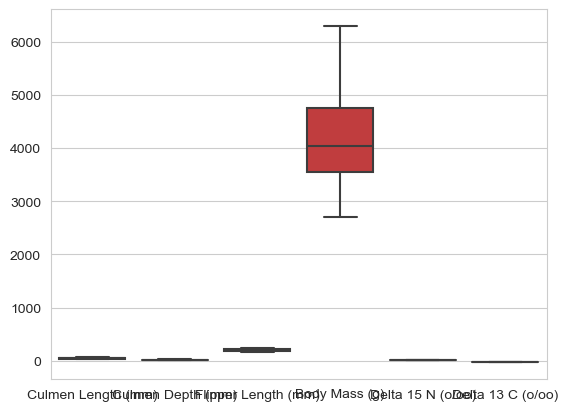

In [127]:
sns.boxplot(data=penguin_manager.get_df().select_dtypes(include=['float64', 'int64']))

The body mass values are in a different range than the other values.

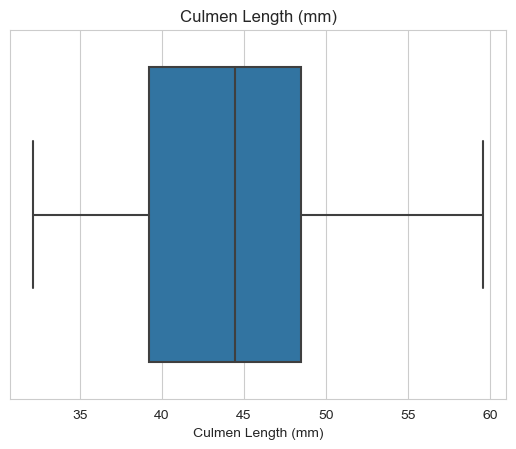

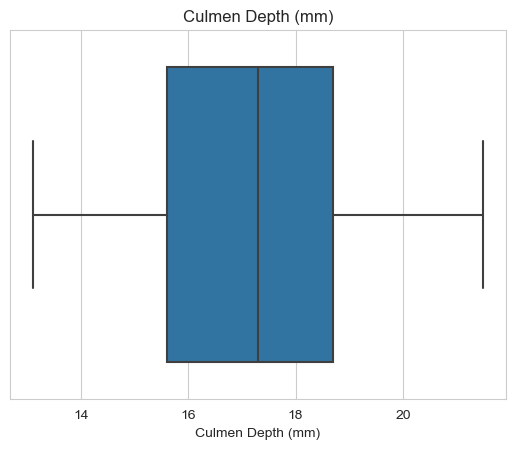

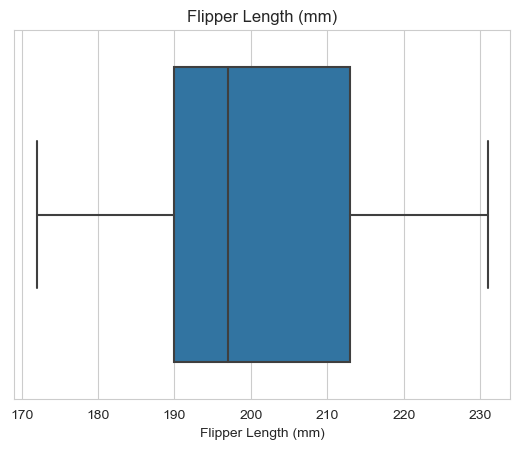

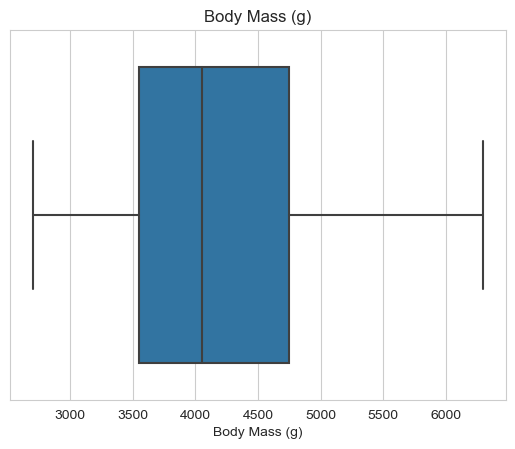

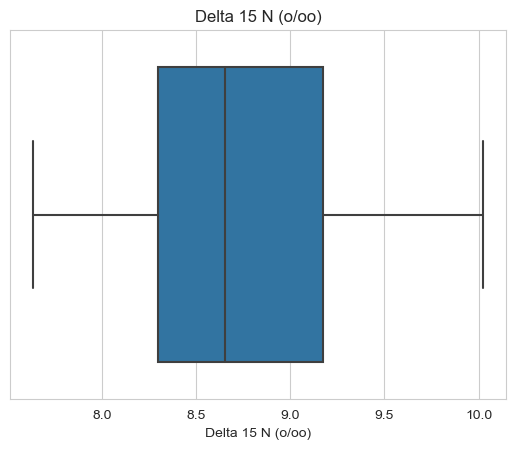

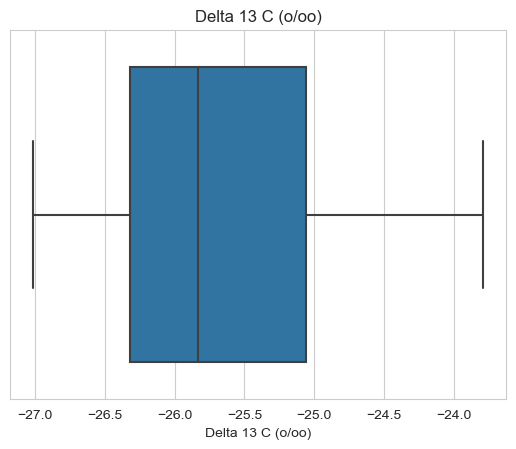

In [128]:
numerical_cols = penguin_manager.get_df().select_dtypes(include=['float64', 'int64'])

# Creare un boxplot per ogni colonna numerica
for col in numerical_cols:
    sns.boxplot(x=penguin_manager.get_df()[col])
    plt.title(col)
    plt.show()

There are evident no outliers in the dataset seen with the box plot.

I will calculate using the standard deviation method.

In [129]:
numerical_cols = penguin_manager.get_df().select_dtypes(include=['float64', 'int64'])

means = numerical_cols.mean()
stds = numerical_cols.std()

# set the threshold to 3 standard deviations
threshold = 3

outliers = pd.DataFrame()

for col in numerical_cols.columns:
    col_outliers = penguin_manager.get_df()[(penguin_manager.get_df()[col] < means[col] - threshold * stds[col]) |
                      (penguin_manager.get_df()[col] > means[col] + threshold * stds[col])]
    col_outliers['feature'] = col
    outliers = pd.concat([outliers, col_outliers])

outliers.head()

Empty DataFrame
Columns: [studyName, Species, Island, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), feature]
Index: []

Even this method doesn't find any outliers for 3 standard deviations.

Calculating the z-score (how many st dev from the mean):

In [130]:
warnings.filterwarnings('ignore')
!pip install scipy
from scipy.stats import zscore
warnings.filterwarnings('default')

In [131]:
z_scores = np.abs(zscore(penguin_manager.get_df().select_dtypes(include=['float64', 'int64'])))

# print the rows with z-score > 3 or < -3
penguin_manager.get_df()[(z_scores > 3).any(axis=1)]

Empty DataFrame
Columns: [studyName, Species, Island, Individual ID, Clutch Completion, Date Egg, Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo)]
Index: []

Overall, no outliers have been found.

At this point I can say that there are no important outliers in the dataset, so I can move on.

## 7 Analyze relationships between variables

Using scatter plots, correlation matrices, and cross-tabulations to explore relationships between pairs of variables. This will help identify potential multicollinearity, interactions, or confounding variables that may need to be addressed in your analysis.

I will create some scatter plot and a bubble plot (no need for both, it's for future reference, where I could add a third numerical dimension) to see if there are some correlations between the features:

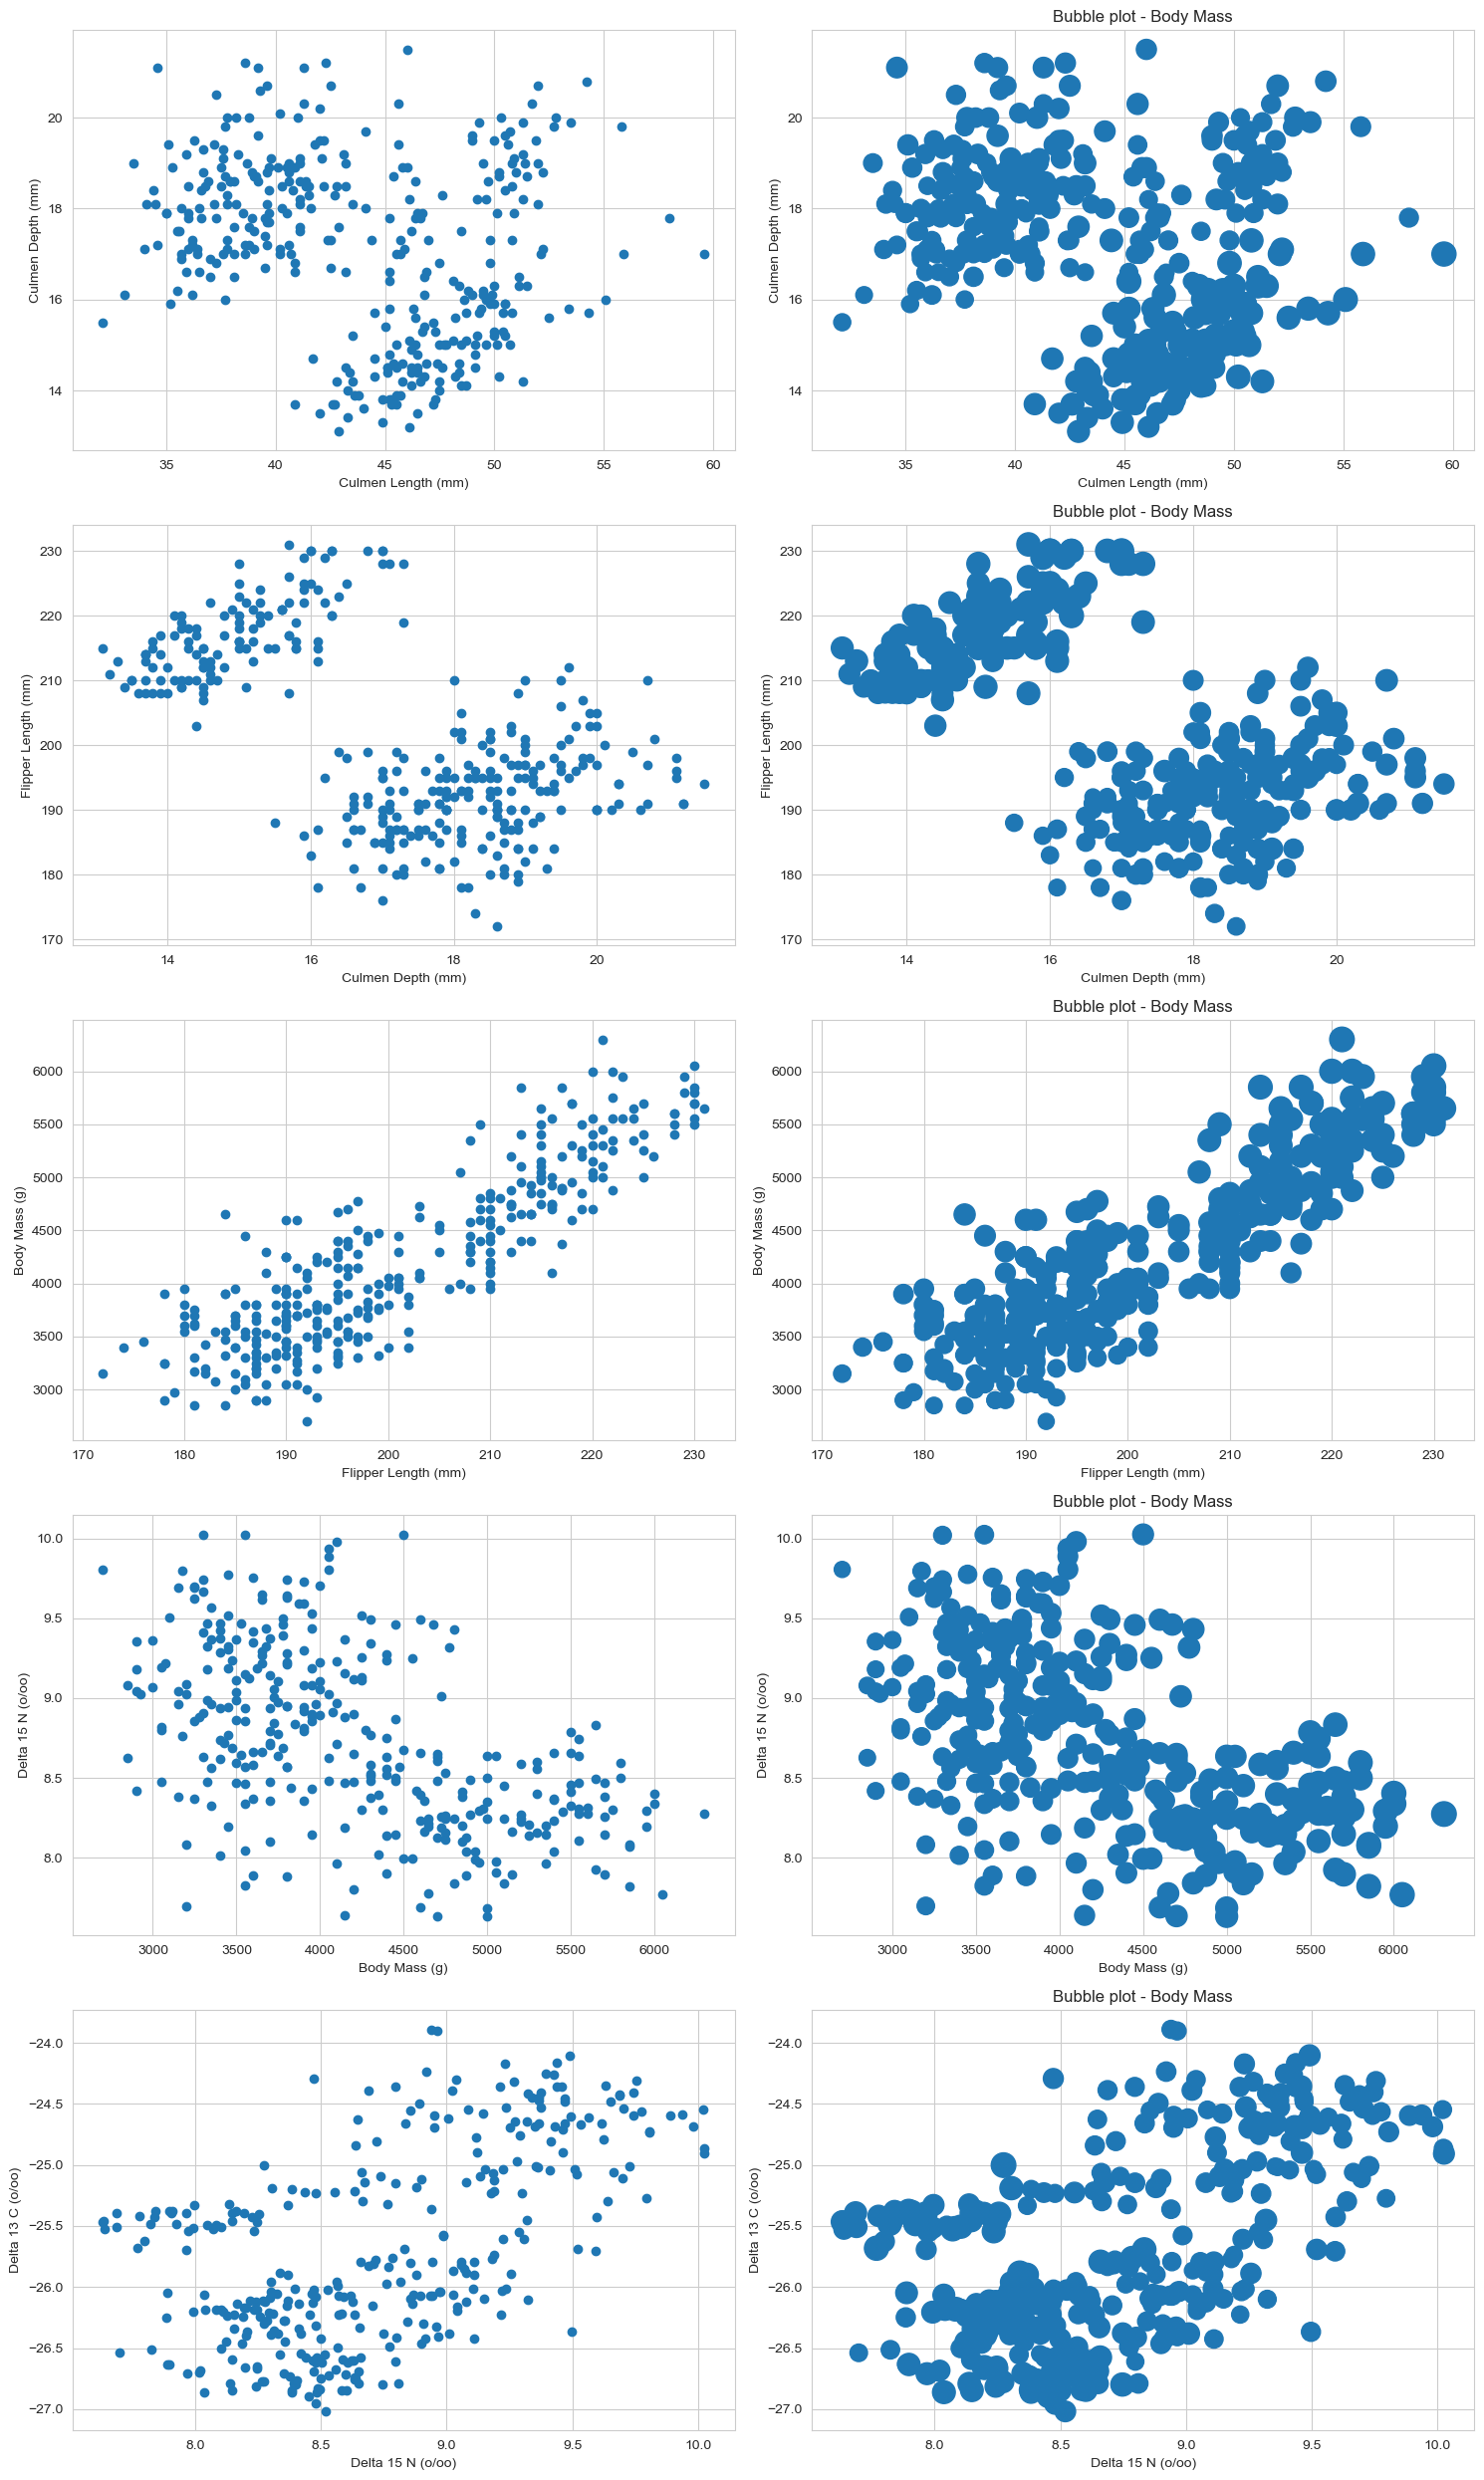

In [132]:
numerical_cols = penguin_manager.decode().select_dtypes(include=['float64', 'int64'])
columns = numerical_cols.columns

nrows = len(columns) - 1
ncols = 2

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

for i, col1 in enumerate(columns[:-1]):
    for j, col2 in enumerate(columns[i + 1:]):
        if j * 2 < ncols:
            axs[i, j * 2].scatter(penguin_manager.get_df()[col1], penguin_manager.get_df()[col2])
            axs[i, j * 2].set_xlabel(col1)
            axs[i, j * 2].set_ylabel(col2)
        if j * 2 + 1 < ncols:
            axs[i, j * 2 + 1].scatter(penguin_manager.get_df()[col1], penguin_manager.get_df()[col2], s=penguin_manager.get_df()['Body Mass (g)'] / 20)
            axs[i, j * 2 + 1].set_xlabel(col1)
            axs[i, j * 2 + 1].set_ylabel(col2)
            axs[i, j * 2 + 1].set_title('Bubble plot - Body Mass')

plt.tight_layout()
plt.show()

Some couple also have a good correlation, some of them appear to be grouped in a cluster, it may be the "Sex", the "Species" or the "Island". But I will check that.

I will do the same with sns.pairplot, but with all features and I will add the sex, island and species as hue.

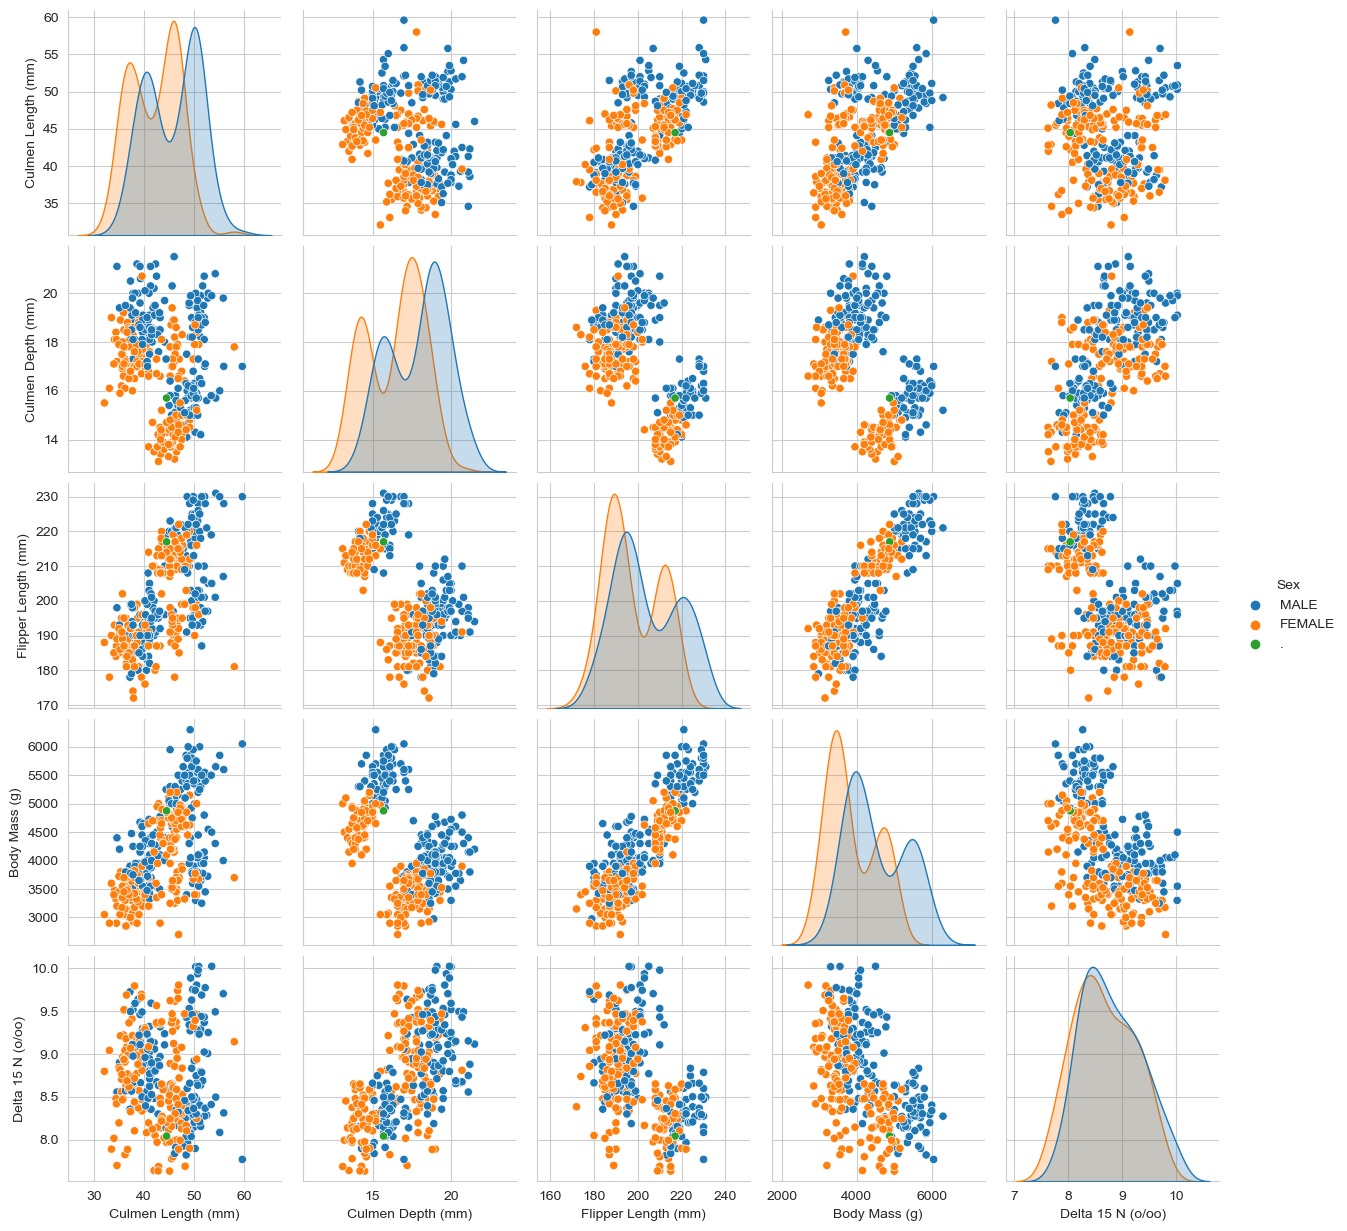

In [133]:
# Plot the pairwise relationships between the columns
sns.pairplot(penguin_manager.get_df(), vars=numerical_cols.columns[:-1], hue="Sex")

No important correlation with sex found in the scatter plot, which is expected since now I know they can change sex.

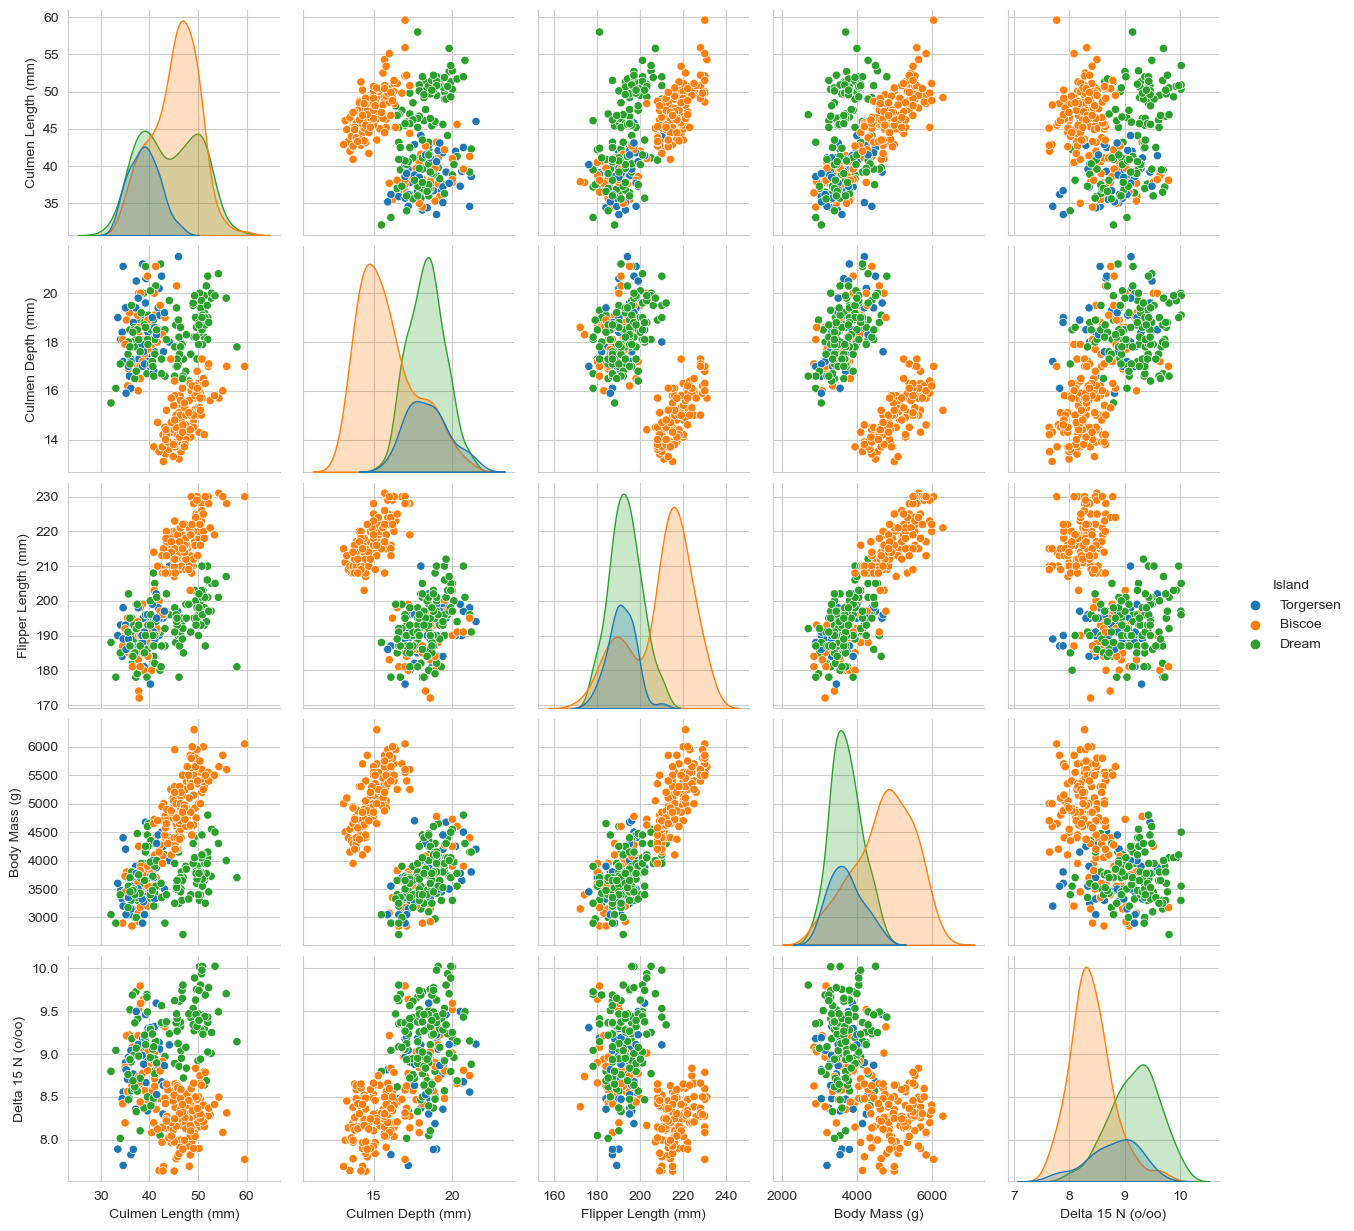

In [134]:
sns.pairplot(penguin_manager.get_df(), vars=numerical_cols.columns[:-1], hue="Island")

The correlation with the island may be a little more evident, but it's not very important.

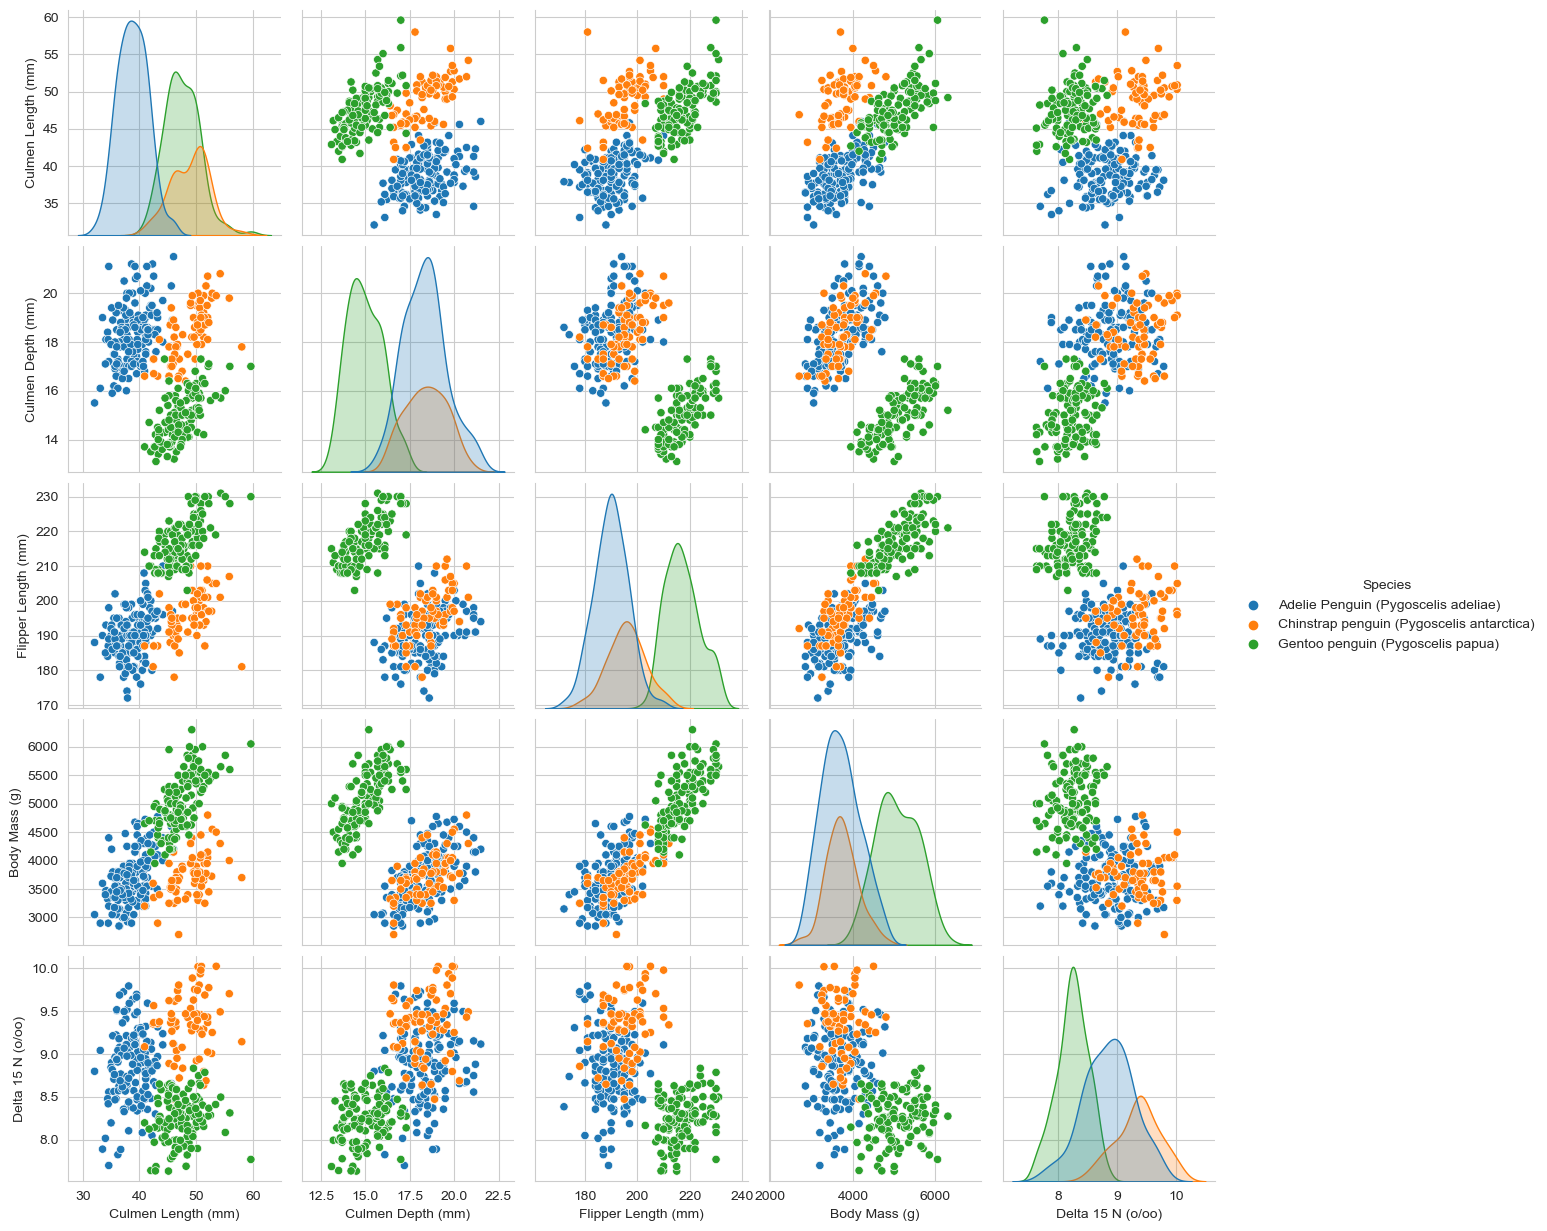

In [135]:
sns.pairplot(penguin_manager.get_df(), vars=numerical_cols.columns[:-1], hue="Species")

The correlation with the species seems to be more important since the clusters and normal distributions are more evident.

Graphically we can see a good correlation between many couples, for instance the features body mass and flipper length is very correlated.

But also compared to the 3 nominal category, we can see that some clusters are formed, and some of this cluster also have a linear correlation. Also, this separation clearly shows a that there is a tendency in the normal distributions of the features that doesn't appear with the sex separation. The most evident is the species separation.

Overall, species and island seems to be more informative than sex. Again, these penguins can change sex and it seems that the only way to find the sex is though blood isotopes.

Now I will check it with the linear correlation matrix.

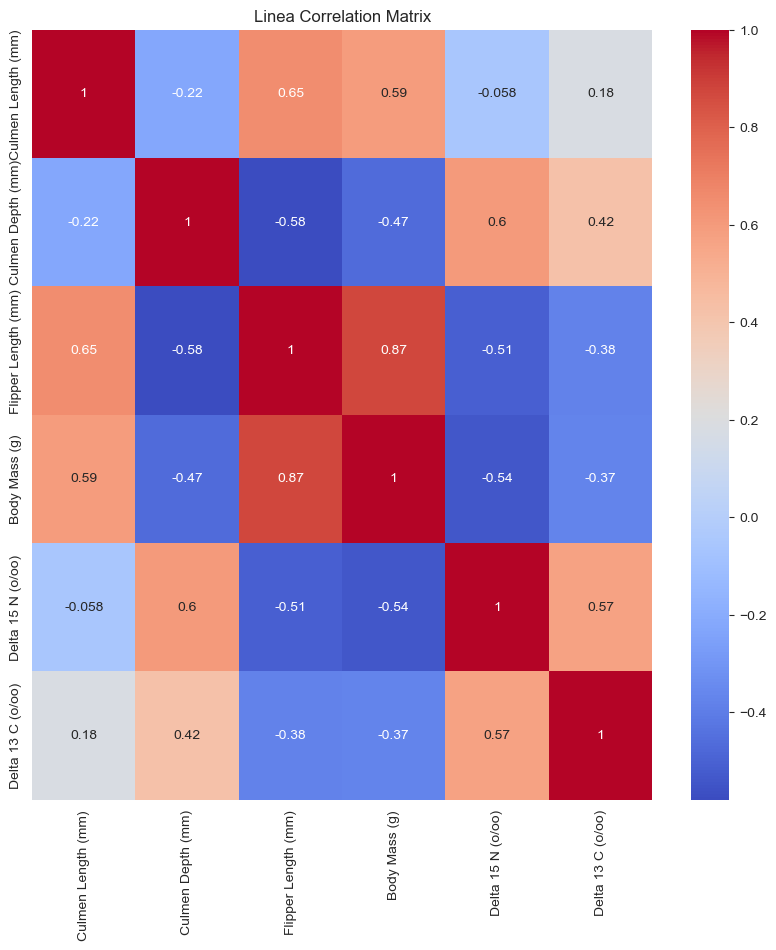

In [136]:
# Get the numerical columns
numerical_cols = penguin_manager.get_df().select_dtypes(include=['float64', 'int64'])
columns = numerical_cols.columns

# Create a new dataframe without NaN values
noNan = penguin_manager.get_df().dropna()

corr_matrix = noNan.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 10))

warnings.filterwarnings('ignore')
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)
warnings.filterwarnings('default')

ax.set_title("Linea Correlation Matrix")

plt.show()

This also shows a correlation between the features body mass and flipper length. As well as some others important correlations of couples.

Now I will check the correlation with the Spearman method which is used to find non-linear correlations. There is also the Kendall method, but I will use only the Spearman method.

<AxesSubplot:>

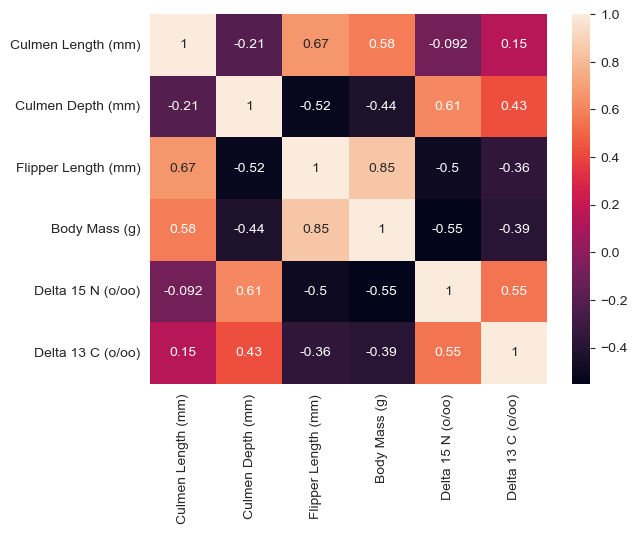

In [137]:
# Create a new dataframe without NaN values
noNan = penguin_manager.get_df().dropna()

# Create the correlation matrix with the spearman method
spearmanCorrMatrix = noNan.corr(method='spearman', numeric_only=True)

sns.heatmap(spearmanCorrMatrix, annot=True)

This method shows a correlation based on the monotone relationship between the features. This means tha the also linear correlation is taken into account. The result are similar to the linear correlation matrix.

However, to see a better correlation I should check after grouping by the nominal features which I won't do.

In [138]:
penguin_manager.get_df()

studyName                              Species     Island Individual ID  \
0     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A1   
1     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A2   
2     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A1   
3     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A1   
4     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A2   
..        ...                                  ...        ...           ...   
337   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N38A1   
338   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A1   
339   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A2   
340   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A1   
341   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A2   

    Clutch Completion   Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0                 Yes 2007-11-11                39.1               18.7   
1                 Yes 2007-11-11                39.5               17.4   
2                 Yes 2007-11-16                40.3               18.0   
3                 Yes 2007-11-16                36.7               19.3   
4                 Yes 2007-11-16                39.3               20.6   
..                ...        ...                 ...                ...   
337                No 2009-12-01                47.2               13.7   
338               Yes 2009-11-22                46.8               14.3   
339               Yes 2009-11-22                50.4               15.7   
340               Yes 2009-11-22                45.2               14.8   
341               Yes 2009-11-22                49.9               16.1   

     Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                  181.0         3750.0    MALE                NaN   
1                  186.0         3800.0  FEMALE            8.94956   
2                  195.0         3250.0  FEMALE            8.36821   
3                  193.0         3450.0  FEMALE            8.76651   
4                  190.0         3650.0    MALE            8.66496   
..                   ...            ...     ...                ...   
337                214.0         4925.0  FEMALE            7.99184   
338                215.0         4850.0  FEMALE            8.41151   
339                222.0         5750.0    MALE            8.30166   
340                212.0         5200.0  FEMALE            8.24246   
341                213.0         5400.0    MALE            8.36390   

     Delta 13 C (o/oo)  
0                  NaN  
1            -24.69454  
2            -25.33302  
3            -25.32426  
4            -25.29805  
..                 ...  
337          -26.20538  
338          -26.13832  
339          -26.04117  
340          -26.11969  
341          -26.15531  

[342 rows x 13 columns]

## 8 Explore categorical variables

Investigate the distribution of categorical variables using frequency tables, bar plots, or pie charts. Look for patterns, imbalances, or rare categories that may require special handling.

In [139]:
# get the categorical columns
categorical_cols = penguin_manager.get_df().select_dtypes(include=['object'])
df_categorical = penguin_manager.get_df()[categorical_cols.columns]
df_categorical.describe()

studyName                              Species  Island Individual ID  \
count        342                                  342     342           342   
unique         3                                    3       3           190   
top      PAL0910  Adelie Penguin (Pygoscelis adeliae)  Biscoe         N69A1   
freq         119                                  151     167             3   

       Clutch Completion   Sex  
count                342   341  
unique                 2     3  
top                  Yes  MALE  
freq                 307   171

### Species

Text(0.5, 1.0, 'Species distribution')

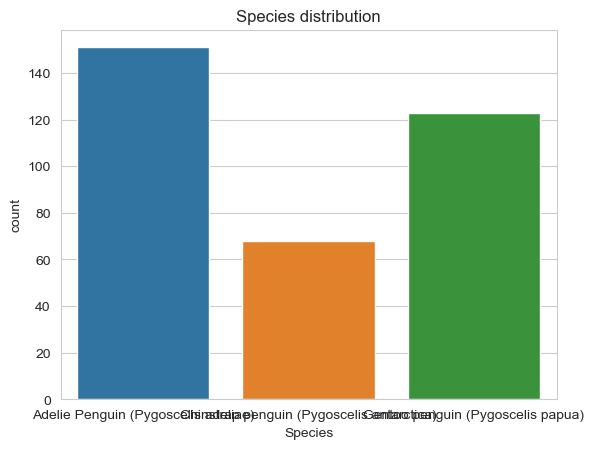

In [140]:
# shows the species distribution
sns.countplot(x='Species', data=df_categorical)
plt.title("Species distribution")

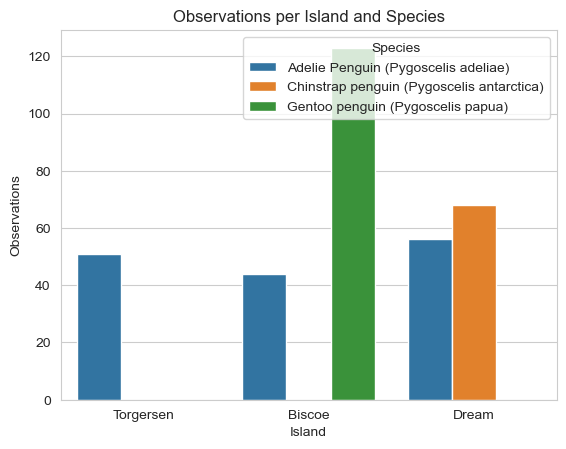

In [141]:
# shows on which island species live on a count plot
sns.set_style("whitegrid")

sns.countplot(x="Island", hue="Species", data=df_categorical)

plt.title("Observations per Island and Species")
plt.xlabel("Island")
plt.ylabel("Observations")

plt.show()

array([<AxesSubplot:ylabel='Adelie Penguin (Pygoscelis adeliae)'>,
       <AxesSubplot:ylabel='Chinstrap penguin (Pygoscelis antarctica)'>,
       <AxesSubplot:ylabel='Gentoo penguin (Pygoscelis papua)'>],
      dtype=object)

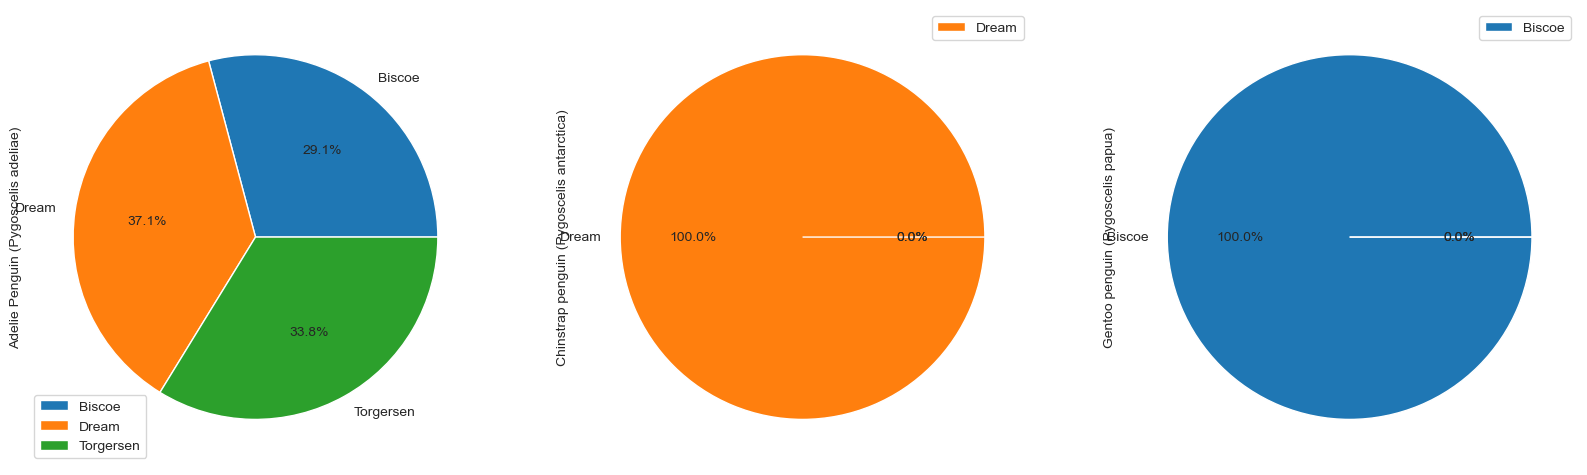

In [142]:
# shows on which island species live on a pie plot
df_categorical.groupby(['Island', 'Species']).size().unstack().plot(kind='pie', subplots=True, figsize=(20, 10), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Adelie Penguin (Pygoscelis adeliae)'>,
       <AxesSubplot:ylabel='Chinstrap penguin (Pygoscelis antarctica)'>,
       <AxesSubplot:ylabel='Gentoo penguin (Pygoscelis papua)'>],
      dtype=object)

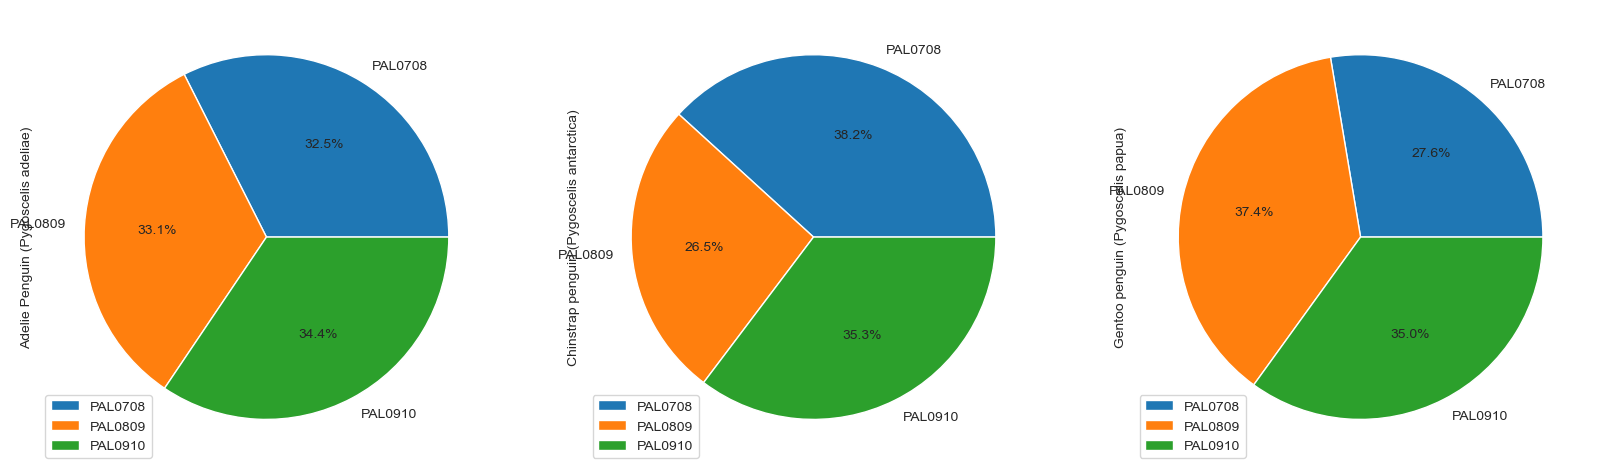

In [143]:
# shows the distribution of species in the study
df_categorical.groupby(['studyName', 'Species']).size().unstack().plot(kind='pie', subplots=True, figsize=(20, 10), autopct='%1.1f%%')

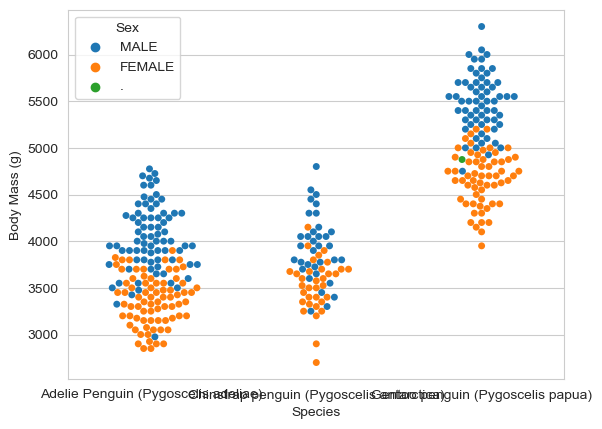

In [144]:
# shows the correlation between "Body Mass (g)" and "Species" in a swarm plot
warnings.filterwarnings('ignore')
sns.swarmplot(x="Species", y="Body Mass (g)", data=penguin_manager.get_df(), hue="Sex")
warnings.filterwarnings('default')

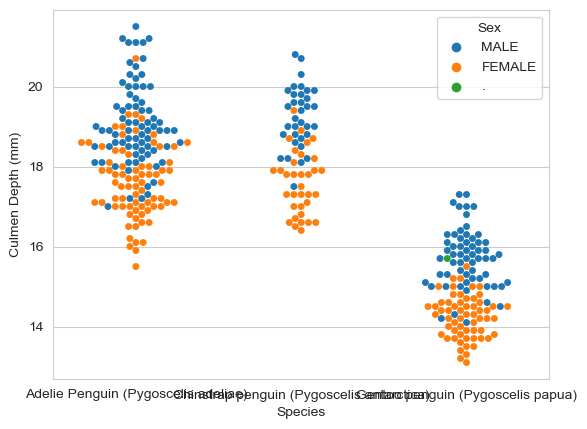

In [145]:
# shows the correlation between "Culmen Depth (mm)" and "Species" in a swarm plot
warnings.filterwarnings('ignore')
sns.swarmplot(x="Species", y="Culmen Depth (mm)", data=penguin_manager.get_df(), hue="Sex")
warnings.filterwarnings('default')

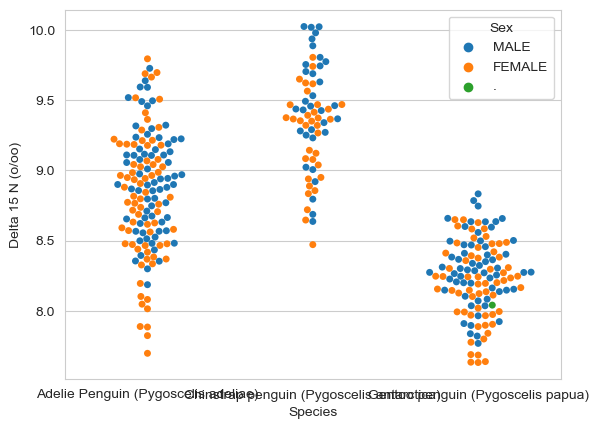

In [146]:
# shows the correlation between "Delta 15N (o/oo)" and "Species" in a swarm plot
warnings.filterwarnings('ignore')
sns.swarmplot(x="Species", y="Delta 15 N (o/oo)", data=penguin_manager.get_df(), hue="Sex")
warnings.filterwarnings('default')

We can see that the species are imbalanced, there are 2 times more Adelie than Chinstrap.

Moreover, we can see that The gentoo lives only on the Biscoe island, the Chinstrap only in the Chinstrap and the Adelie lives everywhere. So if we want to predict the island, the species feature will be very important for the first 2 species and almost useless for the latter.

The studies seem to have a reasonable balance of species.

As comparison with the numerical features, I have chosen the body mass, the culmen depth and the delta 15N. The gentoo seems to sit in specific ranges that is different that the other 2 species, also, using the "Sex" as hue, it seems that this feature may be correlated with the body mass (higher for males) and culmen depth (higher for males). So, even if these penguins could change sex, it may be a rare event that also have influence on the body mass and culmen depth. Therefore, it could be used for the model.

## Island

<AxesSubplot:xlabel='Island', ylabel='count'>

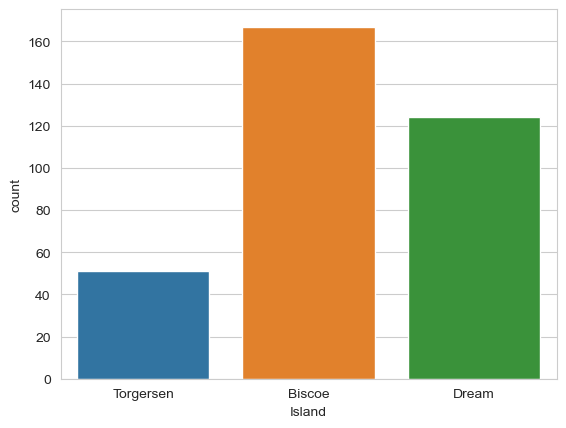

In [147]:
sns.countplot(x='Island', data=df_categorical)

<AxesSubplot:xlabel='Island', ylabel='count'>

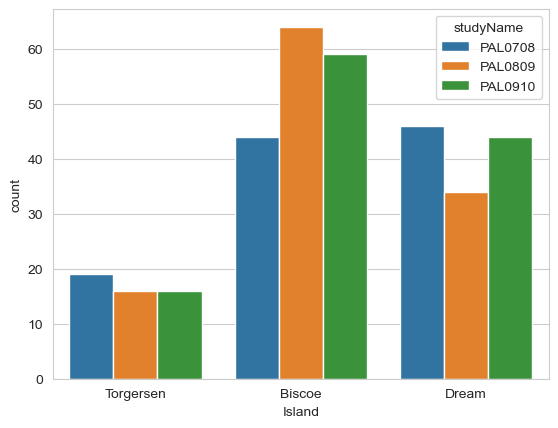

In [148]:
sns.countplot(x='Island', hue='studyName', data=df_categorical)

We can see that there is also a high imbalance between the sample of the islands the gentoo island is the most represented, which is also the only island the gentoo lives. The Torgersen island is underrepresented.

Studies are slightly imbalanced if grouped by island.

### Clutch Completion


<AxesSubplot:xlabel='Clutch Completion', ylabel='count'>

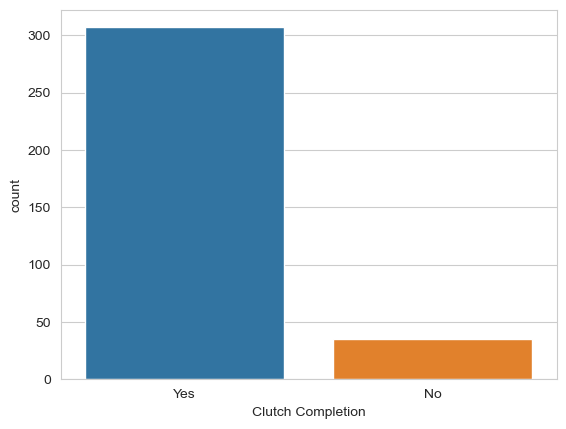

In [149]:
sns.countplot(x='Clutch Completion', data=df_categorical)



### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

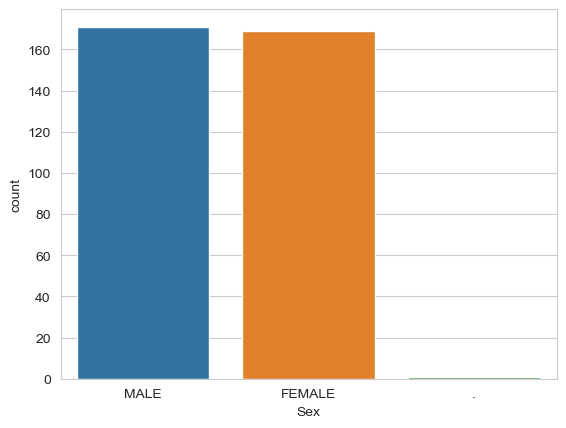

In [150]:
sns.countplot(x='Sex', data=penguin_manager.get_df())

The dataset is overall imbalanced in the most important categorical features which is something to keep in mind while training the model.

The sex is balanced, but we should be aware that is a less important category and the other features are not. In particular, I would not use the "Clutch Completion" feature because it is strongly imbalanced.
Also, the "Toergsen" island is underrepresented.

## 9 Impute missing values

At this point I know there is a correlation between species, anatomical values and sex / isotope, so I will impute them.
This is not meant to be the perfect imputation, but just a way to have a complete dataset to work with. And a future reference.

There are various approaches:

- Impute with the mean
- Impute with the median
- Impute with the mode
- Impute with a constant value
- Impute using forward filling or back-filling
- Impute with a value estimated by another predictive model

I will use the average for the 2 deltas.

In [151]:
# fill deltas with the average
df_filling = penguin_manager.get_df(as_copy=True)

delta_15n_mean = df_filling['Delta 15 N (o/oo)'].mean()
delta_13c_mean = df_filling['Delta 13 C (o/oo)'].mean()

# Fill missing values with mean
df_filling['Delta 15 N (o/oo)'].fillna(value=delta_15n_mean, inplace=True)
df_filling['Delta 13 C (o/oo)'].fillna(value=delta_13c_mean, inplace=True)

# Print the modified dataframe
df_filling

studyName                              Species     Island Individual ID  \
0     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A1   
1     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A2   
2     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A1   
3     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A1   
4     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A2   
..        ...                                  ...        ...           ...   
337   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N38A1   
338   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A1   
339   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A2   
340   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A1   
341   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A2   

    Clutch Completion   Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0                 Yes 2007-11-11                39.1               18.7   
1                 Yes 2007-11-11                39.5               17.4   
2                 Yes 2007-11-16                40.3               18.0   
3                 Yes 2007-11-16                36.7               19.3   
4                 Yes 2007-11-16                39.3               20.6   
..                ...        ...                 ...                ...   
337                No 2009-12-01                47.2               13.7   
338               Yes 2009-11-22                46.8               14.3   
339               Yes 2009-11-22                50.4               15.7   
340               Yes 2009-11-22                45.2               14.8   
341               Yes 2009-11-22                49.9               16.1   

     Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                  181.0         3750.0    MALE           8.733382   
1                  186.0         3800.0  FEMALE           8.949560   
2                  195.0         3250.0  FEMALE           8.368210   
3                  193.0         3450.0  FEMALE           8.766510   
4                  190.0         3650.0    MALE           8.664960   
..                   ...            ...     ...                ...   
337                214.0         4925.0  FEMALE           7.991840   
338                215.0         4850.0  FEMALE           8.411510   
339                222.0         5750.0    MALE           8.301660   
340                212.0         5200.0  FEMALE           8.242460   
341                213.0         5400.0    MALE           8.363900   

     Delta 13 C (o/oo)  
0           -25.686292  
1           -24.694540  
2           -25.333020  
3           -25.324260  
4           -25.298050  
..                 ...  
337         -26.205380  
338         -26.138320  
339         -26.041170  
340         -26.119690  
341         -26.155310  

[342 rows x 13 columns]

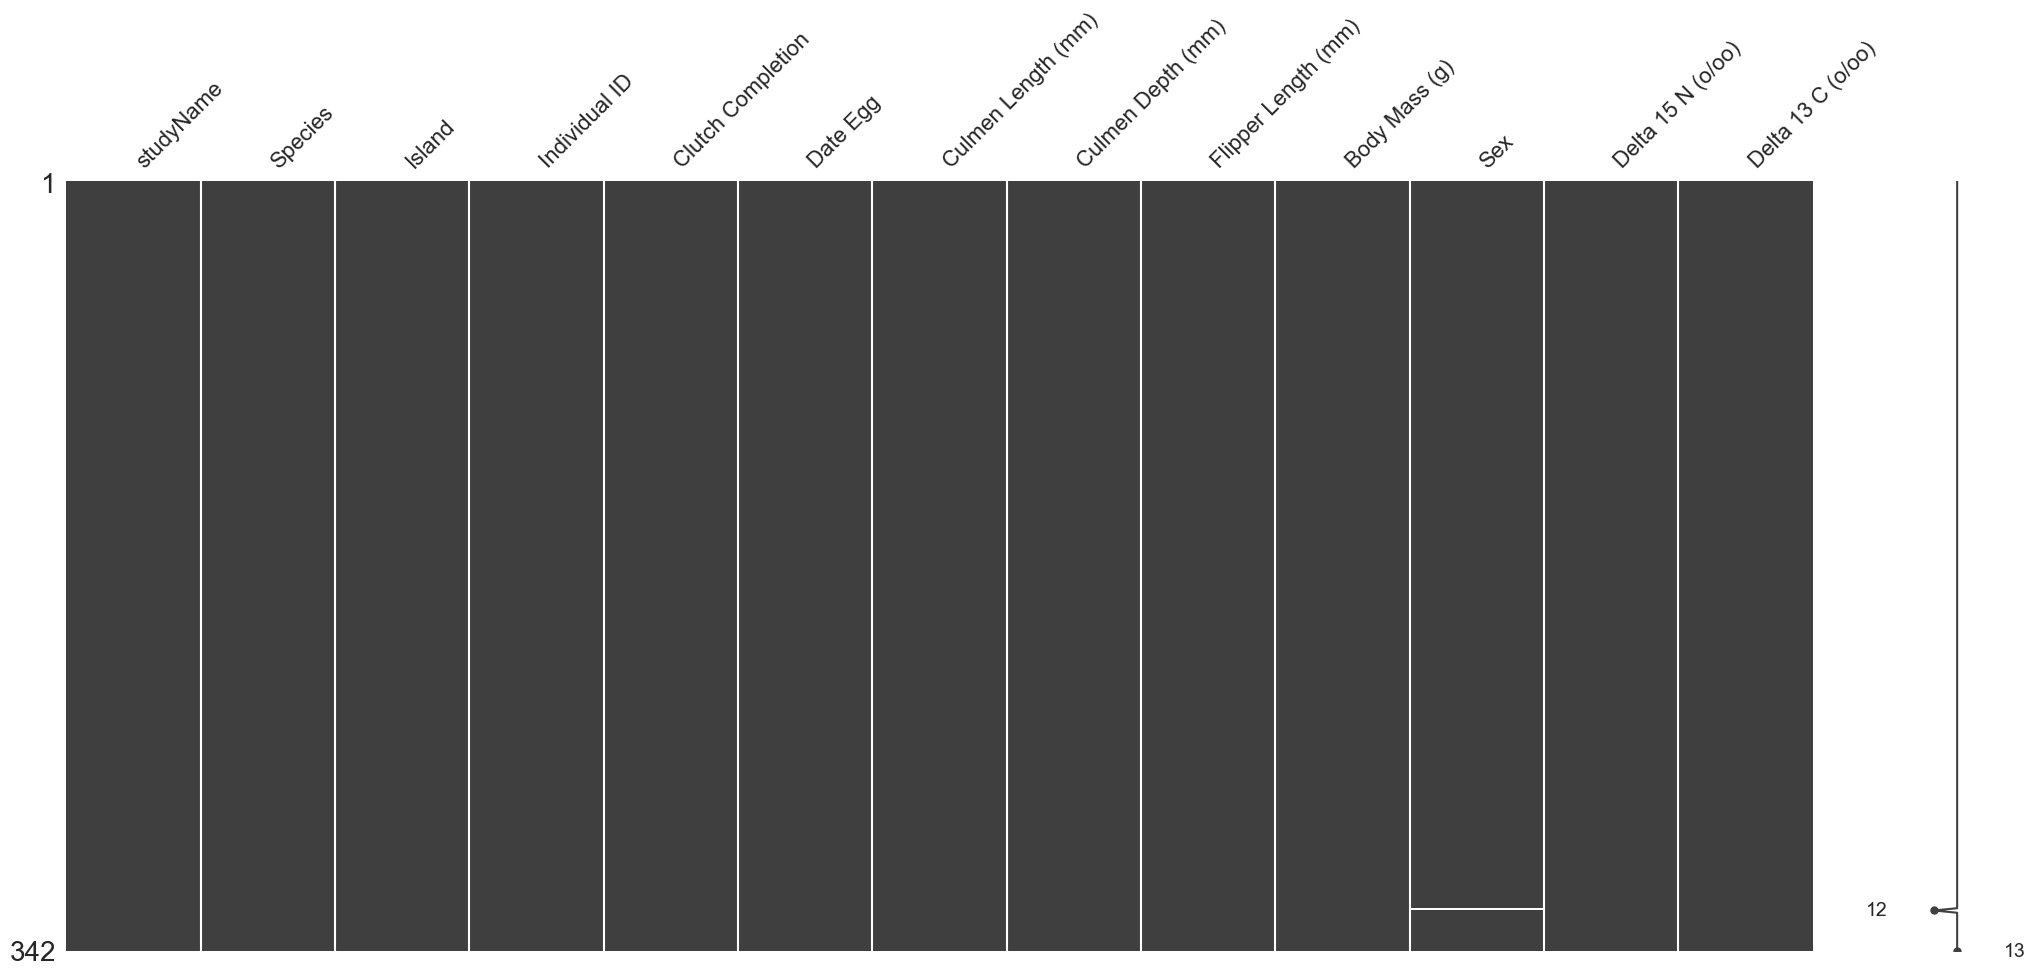

In [152]:
# check for empties with missingno
warnings.filterwarnings('ignore')
msno.matrix(df_filling)
warnings.filterwarnings('default')

In [153]:
# count the missing values
df_filling.isnull().sum()

studyName              0
Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    1
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

The dataset is almost full, now only one row with the value sex is missing. I will use a classifier to predict it.

Since it's not worth to impute with a classifier for one row, I will drop it.

In [154]:
df_filling = df_filling.dropna(subset=['Sex'])
df_filling.isnull().sum()

studyName              0
Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

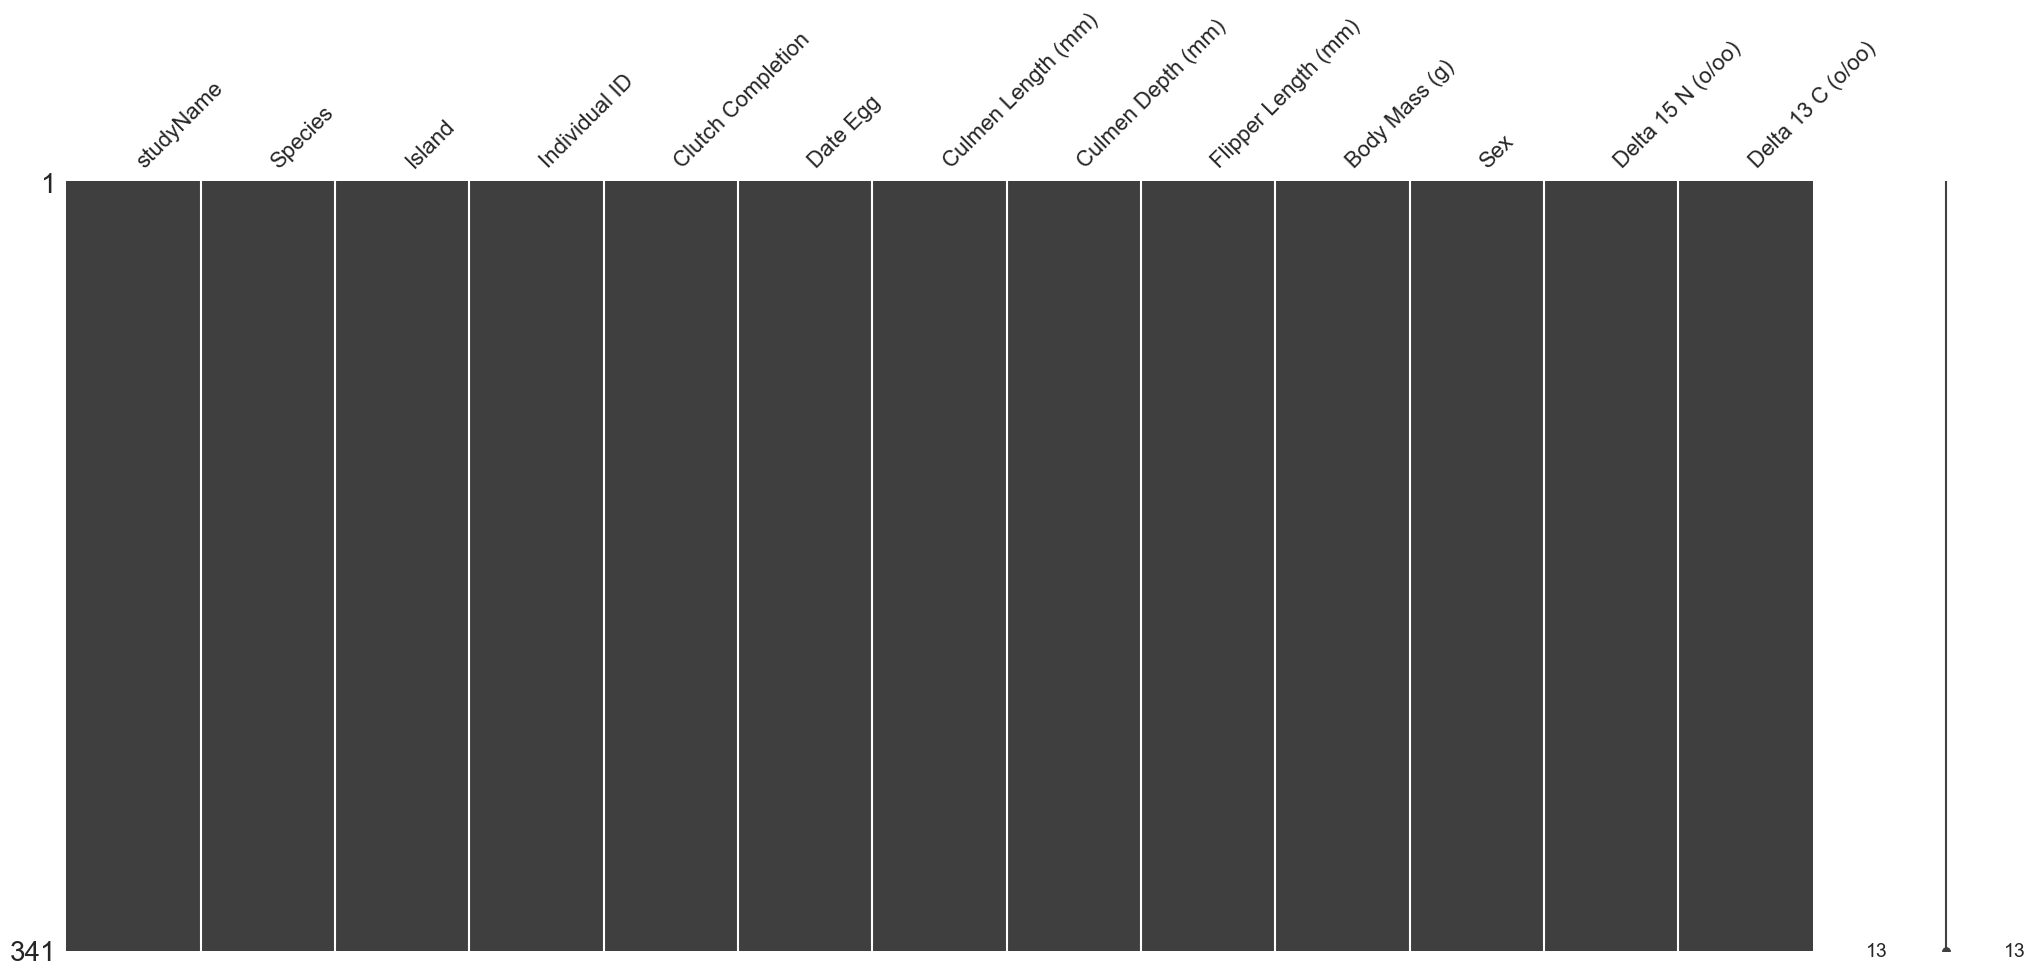

In [155]:
warnings.filterwarnings('ignore')
msno.matrix(df_filling)
warnings.filterwarnings('default')

In total, I dropped 3 rows and imputed the others with the mean. Now I have a dataset withouth missing values.

In [156]:
# recreate the penguin manager
penguin_manager = EncoderManager(df_filling, columns_to_label_encode, columns_to_ordinal_encode, columns_to_onehot_encode)
penguin_manager.get_df()

studyName                              Species     Island Individual ID  \
0     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A1   
1     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N1A2   
2     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N2A1   
3     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A1   
4     PAL0708  Adelie Penguin (Pygoscelis adeliae)  Torgersen          N3A2   
..        ...                                  ...        ...           ...   
337   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N38A1   
338   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A1   
339   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N39A2   
340   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A1   
341   PAL0910    Gentoo penguin (Pygoscelis papua)     Biscoe         N43A2   

    Clutch Completion   Date Egg  Culmen Length (mm)  Culmen Depth (mm)  \
0                 Yes 2007-11-11                39.1               18.7   
1                 Yes 2007-11-11                39.5               17.4   
2                 Yes 2007-11-16                40.3               18.0   
3                 Yes 2007-11-16                36.7               19.3   
4                 Yes 2007-11-16                39.3               20.6   
..                ...        ...                 ...                ...   
337                No 2009-12-01                47.2               13.7   
338               Yes 2009-11-22                46.8               14.3   
339               Yes 2009-11-22                50.4               15.7   
340               Yes 2009-11-22                45.2               14.8   
341               Yes 2009-11-22                49.9               16.1   

     Flipper Length (mm)  Body Mass (g)     Sex  Delta 15 N (o/oo)  \
0                  181.0         3750.0    MALE           8.733382   
1                  186.0         3800.0  FEMALE           8.949560   
2                  195.0         3250.0  FEMALE           8.368210   
3                  193.0         3450.0  FEMALE           8.766510   
4                  190.0         3650.0    MALE           8.664960   
..                   ...            ...     ...                ...   
337                214.0         4925.0  FEMALE           7.991840   
338                215.0         4850.0  FEMALE           8.411510   
339                222.0         5750.0    MALE           8.301660   
340                212.0         5200.0  FEMALE           8.242460   
341                213.0         5400.0    MALE           8.363900   

     Delta 13 C (o/oo)  
0           -25.686292  
1           -24.694540  
2           -25.333020  
3           -25.324260  
4           -25.298050  
..                 ...  
337         -26.205380  
338         -26.138320  
339         -26.041170  
340         -26.119690  
341         -26.155310  

[341 rows x 13 columns]

### 10 Normalize numeric features

Normalization is a common preprocessing step in machine learning that aims to scale features to have similar ranges and avoid that one feature dominates the others during training. By normalizing the data, we can ensure that each feature contributes equally to the model's training, leading to more accurate and robust models. Normalization can also improve the convergence of some machine learning algorithms, such as gradient descent, and reduce the computational complexity.

References: TP02 - Data Preprocessing

The most commons are:

#### Min-max normalization

Used to scale all values in a range between 0 and 1. Function to use: sklearn.preprocessing.MinMaxScaler.

In general, the minmax normalization:

- It's sensitive to outliers. Outliers could outscale the other values.
- It may not preserve the original shape of the data.
- It's good for distance based algorithms (Ex. k-means clustering, hierarchical clustering, and principal component analysis (PCA)).
- It's not good for non-linear data.
Could produce too small values.

#### Z-score normalization

Used to standardize values by scaling them to have a mean of 0 and a standard deviation of 1. Function to use: sklearn.preprocessing.StandardScaler.

In general, the zscore normalization:

- Helps remove outliers influence.
- Works well with normally distributed data.
- Sensitive to EXTREME outliers.
- It may not preserve the original shape of the data.

#### Clipping

This normalization method is used to clip the data between a min and a max value. It's used to remove outliers and to reduce the influence of extreme values. The data is not deleted, but it's replaced with the chosen min or max value if the data is outside the range.

- Helps remove outliers influence.
- It can influence the model.
- Could remove important information that could contain useful information to modeling data

#### Binning

This normalization method is used to bin the data into a fixed number of bins. It's used to remove outliers and to reduce the influence of extreme values.

Binning is a method of transforming continuous variables into discrete variables. It reduces the effects of minor observation errors.

More info on binning: https://en.wikipedia.org/wiki/Data_binning

And: TP02 - Data Preprocessing

#### L1 normalization

Used to normalize the data based on the sum of the absolute values of each observation. Function to use: sklearn.preprocessing.normalize with norm='l1'.

#### L2 normalization

Used to normalize the data based on the sum of the squared values of each observation. Function to use: sklearn.preprocessing.normalize with norm='l2'.

#### Log transformation

Used to scale the data and improve the linearity of relationships. Function to use: numpy.log or numpy.log1p.

### Normalization

For this step I will normalize with Min-Max since I checked before there are no important outliers and these normalizations, and it works well for the PCA which I will use later. The distributions tend to be normal, but the Min-Max normalization should be fine.

array([[<AxesSubplot:title={'center':'Culmen Length (mm)'}>,
        <AxesSubplot:title={'center':'Culmen Depth (mm)'}>],
       [<AxesSubplot:title={'center':'Flipper Length (mm)'}>,
        <AxesSubplot:title={'center':'Body Mass (g)'}>],
       [<AxesSubplot:title={'center':'Delta 15 N (o/oo)'}>,
        <AxesSubplot:title={'center':'Delta 13 C (o/oo)'}>]], dtype=object)

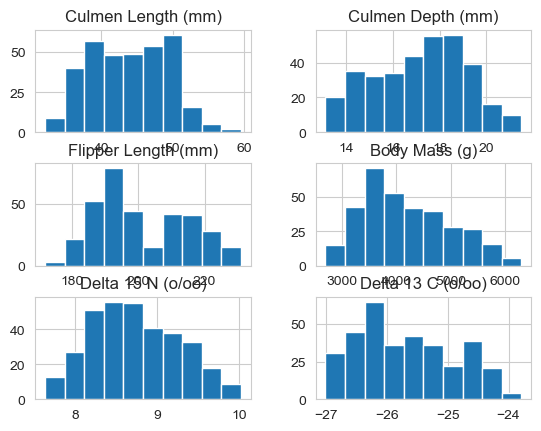

In [157]:
df_numeric_ = penguin_manager.get_df().select_dtypes(include=[np.number])

df_numeric_.hist()

array([[<AxesSubplot:title={'center':'Culmen Length (mm)'}>,
        <AxesSubplot:title={'center':'Culmen Depth (mm)'}>],
       [<AxesSubplot:title={'center':'Flipper Length (mm)'}>,
        <AxesSubplot:title={'center':'Body Mass (g)'}>],
       [<AxesSubplot:title={'center':'Delta 15 N (o/oo)'}>,
        <AxesSubplot:title={'center':'Delta 13 C (o/oo)'}>]], dtype=object)

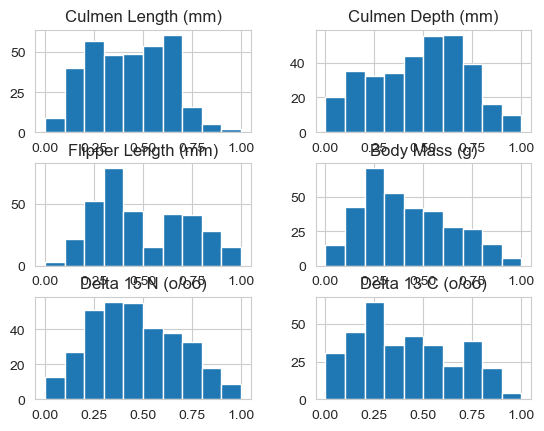

In [158]:
# normalize with Min-Max
df_normalized = penguin_manager.normalize("min-max", inplace=True).get_df()
df_normalized.select_dtypes(include=["float", "int"]).hist()

The result seems pretty good, the distributions are similar to the original ones, but the values are scaled between 0 and 1.

## 11 Pandas Profiling

Before going further, I will use the pandas profiling to get a quick overview of the data at this point.

In [159]:
# pandas profiling
profile = ProfileReport(penguin_manager.get_df(), title="Pandas Profiling Report", explorative=True)
warnings.filterwarnings('ignore')
profile.to_file("profiling/profiling.html")
warnings.filterwarnings('default')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 12 Clustering, dimension reduction with PCA and t-SNE

Using clustering algorithms, principal component analysis (PCA), and t-distributed stochastic neighbor embedding (t-SNE) to further analyze and visualize the data. Clustering helps identify patterns and similarities within the data, while PCA and t-SNE help reduce the dimensionality of the data, making it easier to visualize and interpret. The results of these techniques can provide insights into the underlying structure of the data and help identify any outliers or anomalies.

### Reducing and visualizing using PCA


In [160]:
from sklearn.preprocessing import LabelEncoder

# for this step I will use the encoded and normalized dataset with only the most interesting features
columns_to_use = ['Body Mass (g)', 'Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Species']

df_decoded_pca = penguin_manager.get_df(as_copy=True)

cols_to_label_encode_knn = ['Clutch Completion', 'Sex', 'Individual ID']
cols_to_ordinal_encode_knn = ["Date Egg"]
cols_to_onehot_encode_knn = ['studyName', 'Island']

# for this i will label encode the species
lb = LabelEncoder()
df_decoded_pca['Species'] = lb.fit_transform(df_decoded_pca['Species'])

penguin_manager_knn = EncoderManager(df_decoded_pca, cols_to_label_encode_knn, cols_to_ordinal_encode_knn, cols_to_onehot_encode_knn)

df_encoded_pca = penguin_manager_knn.encode(inplace=False)[columns_to_use]
df_encoded_pca.head()

Body Mass (g)  Flipper Length (mm)  Culmen Length (mm)  Culmen Depth (mm)  \
0       0.291667             0.152542            0.254545           0.666667   
1       0.305556             0.237288            0.269091           0.511905   
2       0.152778             0.389831            0.298182           0.583333   
3       0.208333             0.355932            0.167273           0.738095   
4       0.263889             0.305085            0.261818           0.892857   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  Species  
0           0.460122           0.412350        0  
1           0.550450           0.719311        0  
2           0.307537           0.521692        0  
3           0.473964           0.524404        0  
4           0.431532           0.532516        0

In [161]:
df_encoded_pca.shape

(341, 7)

Now I have 341 rows and 7 columns. I will use the elbow method to find the best number of clusters.

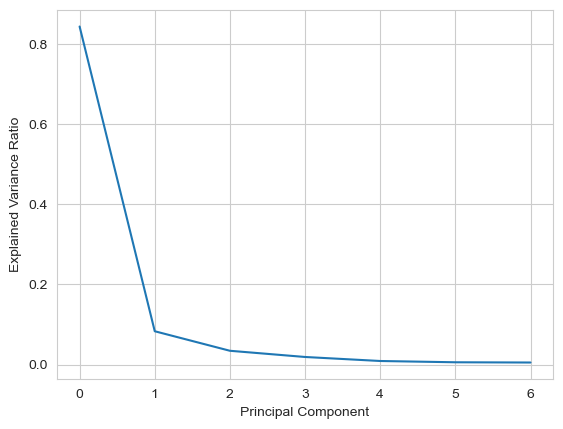

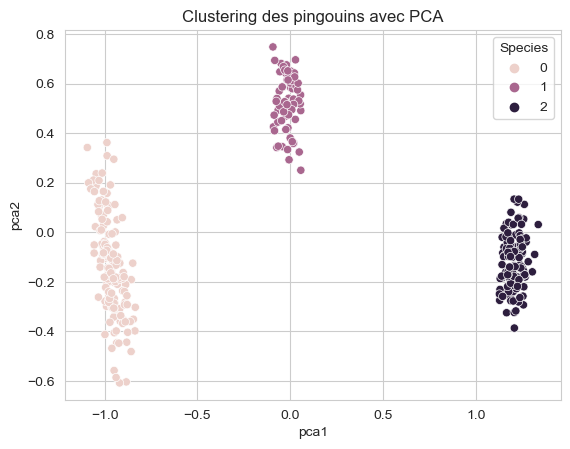

In [162]:
pca = PCA()
data_pca = pca.fit_transform(df_encoded_pca)
df_encoded_pca['pca1'] = data_pca[:, 0]
df_encoded_pca['pca2'] = data_pca[:, 1]

# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot first two principal components
sns.scatterplot(x='pca1', y='pca2', hue='Species', data=df_encoded_pca)
plt.title('Clustering des pingouins avec PCA')
plt.show()

I am not very confident with the PCA, but I think the best number components is 2 because the explained variance ratio is low and the number of component minimal. As we see with the PCA after all the scaling and encoding, it turned out that the result cluster are very clear.

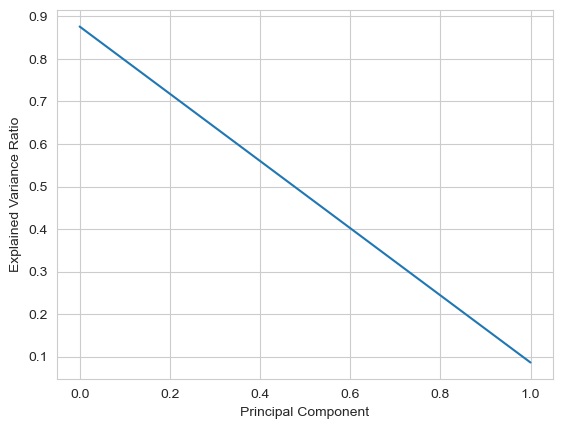

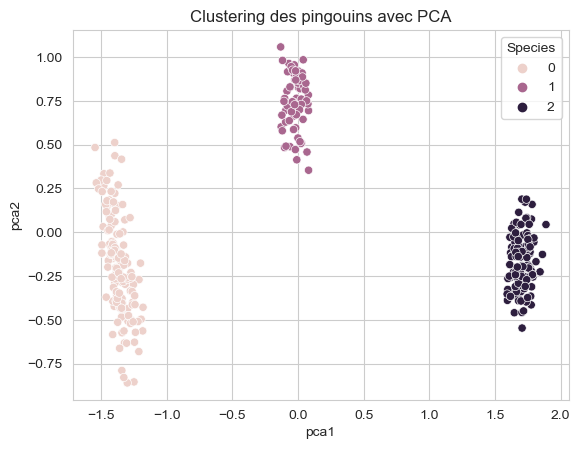

In [163]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_encoded_pca)
df_encoded_pca['pca1'] = data_pca[:, 0]
df_encoded_pca['pca2'] = data_pca[:, 1]

# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot first two principal components
sns.scatterplot(x='pca1', y='pca2', hue='Species', data=df_encoded_pca)
plt.title('Clustering des pingouins avec PCA')
plt.show()

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Definire le feature e il target
X = df_encoded_pca[['pca1', 'pca2']]
y = df_encoded_pca['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


Using the PCA, the prediction is very good.

### Reducing and visualizing using t-SNE

In [165]:
df_encoded_tsne = df_encoded_pca.copy()

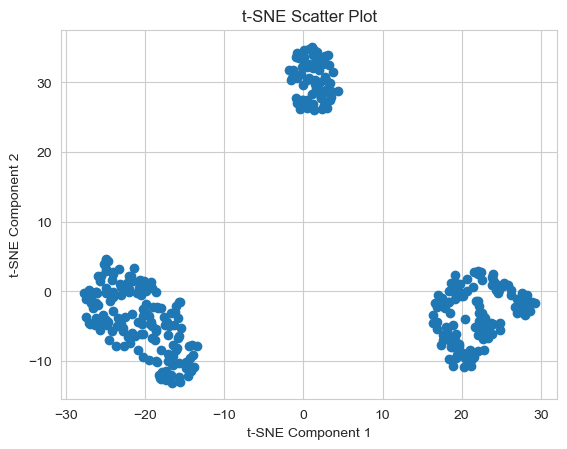

In [166]:
tsne = TSNE(n_components=2)

# fit and transform the data to two dimensions
tsne_data = tsne.fit_transform(df_encoded_tsne)

# create a scatter plot of the t-SNE representation of the data
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')
plt.show()

In [167]:
X = tsne_data[:, :2]
y = df_encoded_tsne['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 1.00


Also with the t-SNE the prediction is very good.

Using the default values the result is strange, even with this method, the clusters pop out very well.

## 12 Model selection and evaluation

Based on the insights gained from EDA, choose the appropriate machine learning model(s) for your problem. Evaluate the performance of the model(s) using appropriate evaluation metrics and cross-validation techniques. Iterate on the model, features, or data preprocessing steps to improve performance, if necessary.

For this step I will use the encoded and normalized dataset. I will use the KNN classifier. I will use the cross-validation to evaluate the model.

At this point I use the KNN because I want a distance-based classifier, and I think it's the best choice for this dataset. I will use the cross-validation to evaluate the model. Moreover, This TP is not intended to train the perfect model, but to show the process of data analysis. However, I will with other models to see how they perform.

I will try to predict the species.

In [168]:
y_knn = penguin_manager.get_df(as_copy=True)["Species"]
X_knn = penguin_manager.get_df(as_copy=True).drop(columns=["Species"])

cols_to_label_encode_knn = ['Clutch Completion', 'Sex', 'Individual ID']
cols_to_ordinal_encode_knn = ["Date Egg"]
cols_to_onehot_encode_knn = ['studyName', 'Island']

penguin_manager_knn = EncoderManager(X_knn, cols_to_label_encode_knn, cols_to_ordinal_encode_knn, cols_to_onehot_encode_knn)

X_knn_encoded = penguin_manager_knn.encode(inplace=False)
X_knn_encoded.head()

Individual ID  Clutch Completion  Date Egg  Culmen Length (mm)  \
0             22                  1       2.0            0.254545   
1             23                  1       2.0            0.269091   
2             44                  1       6.0            0.298182   
3             66                  1       6.0            0.167273   
4             67                  1       6.0            0.261818   

   Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  Sex  \
0           0.666667             0.152542       0.291667    2   
1           0.511905             0.237288       0.305556    1   
2           0.583333             0.389831       0.152778    1   
3           0.738095             0.355932       0.208333    1   
4           0.892857             0.305085       0.263889    2   

   Delta 15 N (o/oo)  Delta 13 C (o/oo)  studyName_PAL0708  studyName_PAL0809  \
0           0.460122           0.412350                1.0                0.0   
1           0.550450           0.719311                1.0                0.0   
2           0.307537           0.521692                1.0                0.0   
3           0.473964           0.524404                1.0                0.0   
4           0.431532           0.532516                1.0                0.0   

   studyName_PAL0910  Island_Biscoe  Island_Dream  Island_Torgersen  
0                0.0            0.0           0.0               1.0  
1                0.0            0.0           0.0               1.0  
2                0.0            0.0           0.0               1.0  
3                0.0            0.0           0.0               1.0  
4                0.0            0.0           0.0               1.0

In [169]:
# split the data
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_knn_encoded, y_knn, test_size=0.2, random_state=42)

In [170]:
from sklearn.metrics import rand_score, adjusted_rand_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train_model, y_train_model)
y_pred_knn = knn.predict(X_test_model)
print(f"Knn score: {accuracy_score(y_pred_knn, y_test_model)}")

warnings.filterwarnings("ignore")
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(X_train_model, y_train_model)
print(f"KMeans score: {adjusted_rand_score(y_train_model, kmeans.labels_)}")
warnings.filterwarnings("default")

gnb = GaussianNB().fit(X_train_model, y_train_model)
y_pred_gnb = gnb.predict(X_test_model)
print(f"Gauss score: {accuracy_score(y_pred_gnb, y_test_model)}")

rfc = RandomForestClassifier(n_estimators=50, criterion="gini").fit(X_train_model, y_train_model)
y_pred_rfc = rfc.predict(X_test_model)
print(f"RFC score: {accuracy_score(y_pred_rfc, y_test_model)}")

reg = LogisticRegression(max_iter=50).fit(X_train_model, y_train_model)
y_pred_reg = reg.predict(X_test_model)
print(f"Logistic Regression: {accuracy_score(y_pred_reg, y_test_model)}")

svc = svm.SVC(kernel="linear", C=1.0).fit(X_train_model, y_train_model)
y_pred_svc = svc.predict(X_test_model)
print(f"C-Support Vector: {accuracy_score(y_pred_svc, y_test_model)}")

Knn score: 0.9130434782608695
KMeans score: 0.09537487102572052
Gauss score: 0.8840579710144928
RFC score: 0.9710144927536232
Logistic Regression: 0.9710144927536232
C-Support Vector: 1.0


C:\Users\stefa\miniconda3\envs\MchineLearning\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I think that this is already a good results for this TP. I will stick with the KNN even if it's not the best accuracy for this dataset, but it has a higher improvement margin. I will try to improve the model by tuning the hyperparameters (which i won't do).

I will use the decision tree to find the most informative features.

In [171]:
tree_clf = DecisionTreeClassifier()

tree_clf.fit(X_knn_encoded, y_knn)

feature_importances = tree_clf.feature_importances_
feature_importances

array([0.03380558, 0.        , 0.        , 0.35479631, 0.01317101,
       0.5319982 , 0.        , 0.        , 0.        , 0.0176711 ,
       0.        , 0.        , 0.        , 0.0485578 , 0.        ,
       0.        ])

In [172]:
indices = feature_importances.argsort()[::-1]

for f in range(X_knn_encoded.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importances[indices[f]]))

1. feature 5 (0.531998)
2. feature 3 (0.354796)
3. feature 13 (0.048558)
4. feature 0 (0.033806)
5. feature 9 (0.017671)
6. feature 4 (0.013171)
7. feature 15 (0.000000)
8. feature 14 (0.000000)
9. feature 12 (0.000000)
10. feature 11 (0.000000)
11. feature 10 (0.000000)
12. feature 8 (0.000000)
13. feature 7 (0.000000)
14. feature 6 (0.000000)
15. feature 2 (0.000000)
16. feature 1 (0.000000)


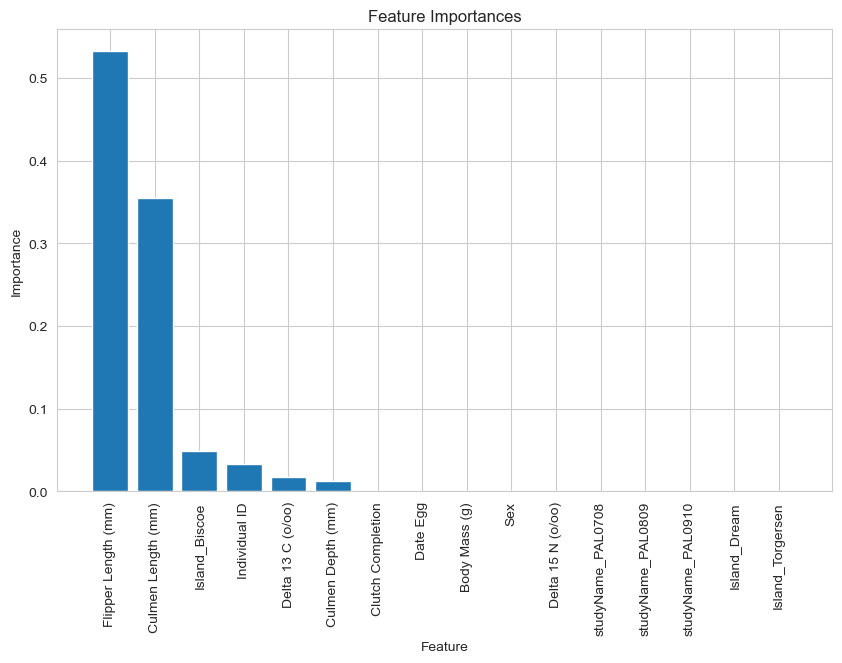

In [173]:
fi = pd.DataFrame({
    'feature': X_knn_encoded.columns,
    'importance': tree_clf.feature_importances_
})

# ordina le feature importances in ordine decrescente
fi = fi.sort_values(by='importance', ascending=False)

# crea un grafico delle feature importances
plt.figure(figsize=(10, 6))
plt.bar(fi['feature'], fi['importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

it seems that only the 6 features are important, i will try to retrain the model only with them.

In [174]:
X_train_knn_sim = X_train_model[["Flipper Length (mm)", "Culmen Length (mm)", "Island_Biscoe", "Individual ID", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)", "Sex"]]

X_test_knn_sim = X_test_model[["Flipper Length (mm)", "Culmen Length (mm)", "Island_Biscoe", "Individual ID", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)", "Sex"]]

X_test_knn_sim.head()

Flipper Length (mm)  Culmen Length (mm)  Island_Biscoe  Individual ID  \
322             0.949153            0.618182            1.0             31   
116             0.457627            0.189091            0.0            113   
113             0.322034            0.272727            1.0            108   
42              0.406780            0.436364            0.0             39   
126             0.389831            0.341818            0.0            131   

     Delta 13 C (o/oo)  Delta 15 N (o/oo)  Sex  
322           0.379622           0.429100    2  
116           0.201729           0.778965    2  
113           0.070866           0.491998    1  
42            0.771173           0.670639    2  
126           0.307669           0.373327    2

In [175]:
knn_sim = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train_knn_sim, y_train_model)

# predict
y_pred_knn = knn.predict(X_test_knn_sim)

# evaluate
print("Accuracy:", accuracy_score(y_test_model, y_pred_knn))

Accuracy: 0.5797101449275363


I had to try, but this want a good idea. I will use the original dataset.

## 14 Report and communicate findings

Summarize your findings from the EDA and document any insights, patterns, or relationships discovered during the process. Use clear visualizations and concise language to communicate your results to stakeholders.

### Summary

This dataset contains data about penguins. Some features are useless and can be ignored, but the other are useful to some information. FOr instance the species of the penguin. But other columns could be predicted. Some correlation is present with the sex of the penguin, as well as the others like the island, the flipper length and the culmen length. Also, the BMI seems to have a good predictability index.

I manged to predict the species with a good accuracy, but I think that the model could be improved. I think that the dataset may be too small to train a good model, and the client should sample more data.

It would be nice to apply a classificator (class = day) on the date without the year, on the date egg date, to predict futures egg dates in the year, but it would require a lot more samples since the final classes would be 365. An interesting information to add could be the date the egg opened, this would allow the prediction the egg birthdate.

No outliers were not found, but some missing data were present.

Overall the missing data wasn't too much, and it was possible to manage it. Only 3 rows were dropped.

A problem could be the imbalance to some feature, for instance, it would not be possible to predict the clutch completion because the model would be too biased, trying balance it would not be possible otherwise it would result in too few data.

Moreover, the client should sample more data about the Chinstrap penguin.

It could be interesting to have the data about the behaviour to see how they could help to predict others features, or how the other features could predict the behaviour.